<h2>aXe Installation</h2>

aXe can be installed as part of Anaconda 3. It requires a Python 2.7 installation, Pyraf , pydrizzle and multidrizzle. It is therefore recommended that i be installed as a new Anaconda 3 environment, using the following steps: 

<li> Install anaconda 3 from https://www.anaconda.com/download/#macos, and follow the installation instructions.<br>Note: aXe has several dependencies which can be broken if packages with incompatible versions are installed. The file [req_axe_2.6.2.txt](file://req_axe_2.6.2.txt) contains a list of packages that allow aXe to run properly:<br>
<li> Add the STScI channel to anaconda: <br>
```conda config --add channels http://ssb.stsci.edu/astroconda```
<li>Create the new aXe anaconda environment: <br>
```conda create -n axe-wfc3 —file req_axe_2.6.2.txt```
<li>Once the axe-wfc3 is activated (in a new terminal, after issuing the command ```source activate axe-wfc3```), add pydrizzle and multidrizzle to axe-wfc3: <br>
```pip install multidrizzle``` <br>
<li>You will likely need Sextractor, which can be installed using anaconda with: <br>
```conda install sextractor```


Import a few Python modules

In [2]:
from astropy.io import fits
import numpy as np
import os, shutil


from pyraf import iraf
from drizzlepac import astrodrizzle

iraf.stsdas()
iraf.analysis()
iraf.slitless()
iraf.axe()



analysis/:
 dither/        fourier/        isophote/       restore/        statistics/
 fitting/       gasp/           nebular/        slitless/
slitless/:
 axe/           axesim/

  The aXe software package (now version 2.6.2) was developed by the 
  Slitless Spectroscopy group of the ST-ECF.  Maintenance
  is now provided by the Space Telescope Science Institute.
  Further information is available at:
  http://axe-info.stsci.edu

  Any questions regarding this software can be directed to:
  help@stsci.edu

axe/:
 af2pet         axeprep         fcubeprep       petcont
 axecore        backest         gol2af          petff
 axedrizzle     drz2pet         iolprep         sex2gol
 axegps         drzprep         pet2spc         stamps


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

We save the current working directory

In [4]:
cwd = os.getcwd()
print("We are in %s" % (cwd))

We are in /Users/npirzkal/Downloads/aXe_Cookbook


<H2>Preparing the G141 data

We will create a G141 subdirectory to copy all of the G141 files into. This where we will prepare the G141 data

Creating the directory, removing any existing one

In [5]:
os.chdir(cwd)
if os.path.isdir("G141"):
    shutil.rmtree("G141")
os.mkdir("G141")

Copying the G141 data (which we grab from our cookbook_data directory)

In [6]:
os.system("cp cookbook_data/G141/*flt.fits G141/")
os.system("cp cookbook_data/G141/G141.lis G141/")

0

We move into the G141 directory and check the content of the G141.lis file

In [7]:
os.chdir(cwd)
os.chdir("G141")
!cat G141.lis

ib6o23rsq_flt.fits
ib6o23ruq_flt.fits
ib6o23ryq_flt.fits
ib6o23s0q_flt.fits

We now create a G141 mosaic using the G141 data

This mosaic will be used to set up the proper astrometry for each individual FLT files. We can only extract G141 spectra from FLT files which have been used to make this mosaic

In [8]:
astrodrizzle.AstroDrizzle("@G141.lis",output="G141",build=True)

INPUT_DICT: {'output': 'G141', 'build': True, 'input': '@G141.lis'}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.21(12-January-2018) started at: 17:11:49.806 (04/03/2019)

==== Processing Step  Initialization  started at  17:11:49.810 (04/03/2019)

Preserving original of:  ib6o23rsq_flt.fits as  OrIg_files/ib6o23rsq_flt.fits

Preserving original of:  ib6o23ruq_flt.fits as  OrIg_files/ib6o23ruq_flt.fits

Preserving original of:  ib6o23ryq_flt.fits as  OrIg_files/ib6o23ryq_flt.fits

Preserving original of:  ib6o23s0q_flt.fits as  OrIg_files/ib6o23s0q_flt.fits

********************************************************************************

*

*  Estimated memory usage:  up to 90 Mb.

*  Output image size:       1240 X 1038 pixels. 

*  Output image file:       ~ 14 Mb. 

*  Cores available:         4

*

********************************************************************************

==== Processing Step  Initialization  finished at  17:11:52.238 (04/03/2019)

==== 

We now prepare the F140W Imaging data

We already created a mosaic of all the G141 data for astrometric purposes, and we now create an F140W mosaic using the G141 mosaic as the astrometric reference frame. This will ensure that the G141 and F140W mosaics have pixels with the same RA and DEC. 
The process is similar to what we did with the G141 data and we do this in a F140W sub-directory. The F140W mosaic is generated with the same WCS as the G141 mosaic we already generated.

Creating the directory, removing any existing one

In [9]:
os.chdir(cwd)

if os.path.isdir("F140W"):
    shutil.rmtree("F140W")

os.mkdir("F140W")


Copy the F140W data (which we grab from our cookbook_data directory)

In [10]:
os.system("cp cookbook_data/F140W/*flt.fits F140W/")
os.system("cp cookbook_data/F140W/F140W.lis F140W/")

0

We move into the F140W directory and check the content of the F140W.lis file

In [11]:
os.chdir(cwd)
os.chdir("F140W")
!cat F140W.lis

ib6o23rtq_flt.fits
ib6o23rwq_flt.fits
ib6o23rzq_flt.fits
ib6o23s2q_flt.fits


We create a F140W mosaic using the F140W data and the G141 mosaic as a reference

In [12]:
ref = "../G141/G141_drz.fits[1]"
astrodrizzle.AstroDrizzle("@F140W.lis",output="F140W",in_memory=False,skysub="yes",build=True,driz_cr_corr=True,driz_cr=True,final_wcs=True,driz_separate=True,driz_sep_wcs=True,driz_sep_refimage=ref,final_refimage=ref)

INPUT_DICT: {'driz_separate': True, 'final_refimage': '../G141/G141_drz.fits[1]', 'final_wcs': True, 'skysub': 'yes', 'driz_cr_corr': True, 'driz_sep_refimage': '../G141/G141_drz.fits[1]', 'build': True, 'driz_cr': True, 'input': '@F140W.lis', 'in_memory': False, 'output': 'F140W', 'driz_sep_wcs': True}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.21(12-January-2018) started at: 17:12:04.512 (04/03/2019)

==== Processing Step  Initialization  started at  17:12:04.516 (04/03/2019)

Preserving original of:  ib6o23rtq_flt.fits as  OrIg_files/ib6o23rtq_flt.fits

Preserving original of:  ib6o23rwq_flt.fits as  OrIg_files/ib6o23rwq_flt.fits

Preserving original of:  ib6o23rzq_flt.fits as  OrIg_files/ib6o23rzq_flt.fits

Preserving original of:  ib6o23s2q_flt.fits as  OrIg_files/ib6o23s2q_flt.fits

Creating OUTPUT WCS from ../G141/G141_drz.fits[1]

********************************************************************************

*

*  Estimated memory usage:  up to 90 Mb.



The F140W and G141 should be aligned and bright objects should generate bright spectra in the expected position. We should see very liittle offset in the y-direction for WFC3 IR grism data

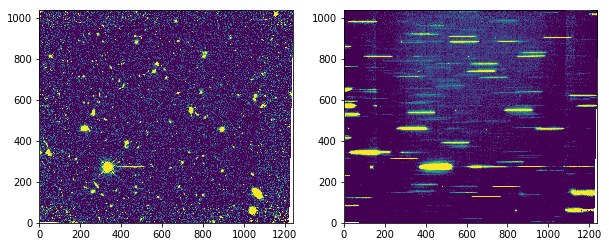

In [13]:
plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(1,2,1)
d = fits.open("F140W_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

plt.subplot(1,2,2)
d = fits.open("../G141/G141_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

We create an object catalog using sextractor

This is one step that needs to be done carefully as several things can go wrong.
- Make sure you set the magnitude zeropoint properly for the image you are using
- One can generate a simple catalog using:

    sex -c aXe.sex F140W_drz.fits[1] -DETECT_THRESH 5 -MAG_ZEROPOINT 26.4525
    
    
- See aXe.param for the required parameters that aXe will be looking for
- Check the resulting catalog to make sure that all objects have good magnitudes (i.e. no mag of 99.)
- Edit cookbook.cat and rename column MAG_ISO with MAG_F1392, or you will get an "aXeError: Catalogue: test.cat does not contain any magnitude column!" error when running iolprep

This catalog, when doing a simple extraction, will be used to compute the SED of each sources. These SEDs will be used to compute our contamination models. In this example, we used a single band, F140W, but we could have added information in other bands such as F125W for example. This requires running Sextractor in matched photometry mode, and the creation of a catalog where magnitudes in multiple bands are properly listed

For simplicity, here, we copy an already generated catalog:

In [14]:
os.system("cp ../cookbook_data/cookbook.cat .")
!cat cookbook.cat

#   1 X_IMAGE                Object position along x                                    [pixel]
#   2 Y_IMAGE                Object position along y                                    [pixel]
#   3 NUMBER                 Running object number                                     
#   4 X_WORLD                Barycenter position along world x axis                     [deg]
#   5 Y_WORLD                Barycenter position along world y axis                     [deg]
#   6 A_IMAGE                Profile RMS along major axis                               [pixel]
#   7 B_IMAGE                Profile RMS along minor axis                               [pixel]
#   8 THETA_IMAGE            Position angle (CCW/x)                                     [deg]
#   9 A_WORLD                Profile RMS along major axis (world units)                 [deg]
#  10 B_WORLD                Profile RMS along minor axis (world units)                 [deg]
#  11 THETA_WORLD            Position angle (CCW/world-x) 

We can now run aXe

We start by setting up some necessary environment variables that point to the various aXe directories.
Make sure that you keep the path length to be less than 80 characters when the code points to individual data files, or about 60 characters without the file names to be safe

Create a directory called CONF and copy the WFC3 G141 IR Calibration files in there.

In [15]:
os.chdir(cwd)

if os.path.isdir("CONF"):
    shutil.rmtree("CONF")
os.mkdir("CONF")

os.system("cp cookbook_data/CONF/* CONF/")

0

Set up some work directories and environment variables required by aXe:

In [16]:
import os
from pyraf import iraf


os.chdir(cwd)

iraf.stsdas()
iraf.analysis()
iraf.slitless()
iraf.axe()

if os.path.isdir("DATA"):
    shutil.rmtree("DATA")
os.mkdir("DATA")
os.environ['AXE_IMAGE_PATH'] = './DATA/' 
print '--> variable AXE_IMAGE_PATH   set to "./DATA/"'

os.environ['AXE_CONFIG_PATH'] = './CONF/'
print '--> variable AXE_CONFIG_PATH  set to "./CONF/"'

if os.path.isdir("OUTPUT"):
    shutil.rmtree("OUTPUT")
os.mkdir("OUTPUT")
os.environ['AXE_OUTPUT_PATH'] = './OUTPUT/'
print '--> variable AXE_OUTPUT_PATH  set to "./OUTPUT/"'

print "Length of AXE_IMAGE_PATH is",len(os.environ['AXE_IMAGE_PATH']),"characters"


--> variable AXE_IMAGE_PATH   set to "./DATA/"
--> variable AXE_CONFIG_PATH  set to "./CONF/"
--> variable AXE_OUTPUT_PATH  set to "./OUTPUT/"
Length of AXE_IMAGE_PATH is 7 characters


We define the FOV boundaries for the WFC3 IR observations

In [17]:
dimension_info = "183,85,50,50"

We copy the G141 FLT files and the F140W FLT files in the DATA directory

You can either use the original data or optionally the FLT files used to create the G141 mosaic earlier, which will have some extra bad pixels flagging

In [18]:
os.system("cp G141/*flt.fits DATA/")
os.system("cp F140W/*flt.fits DATA/")

0

We use the iolprep aXe task to generate individual F140W catalogs

This task will create the individual F140W extraction catalogs, one for each of the files listed in the F140W.lis file. 
We pass the F140W mosaic to it, as it contains all the information about all the individual F140W FLT file.

In [19]:
os.chdir(cwd)
os.chdir("F140W")
iraf.iolprep.mdrizzle_image = "F140W_drz.fits"
iraf.iolprep.input_cat = "cookbook.cat"
iraf.iolprep.dimension_info = dimension_info


iraf.iolprep.run(mode="h")


IOLPREP: 4 Input Object Lists will be created!


 >>>> Working on Input Object List:  ib6o23rtq_flt_1.cat >>>>


 >>>> Catalog:  ib6o23rtq_flt_1.cat written with  365 entries.>>>>


 >>>> Working on Input Object List:  ib6o23rwq_flt_1.cat >>>>


 >>>> Catalog:  ib6o23rwq_flt_1.cat written with  333 entries.>>>>


 >>>> Working on Input Object List:  ib6o23rzq_flt_1.cat >>>>


 >>>> Catalog:  ib6o23rzq_flt_1.cat written with  352 entries.>>>>


 >>>> Working on Input Object List:  ib6o23s2q_flt_1.cat >>>>


 >>>> Catalog:  ib6o23s2q_flt_1.cat written with  392 entries.>>>>



We copy the newly create catalog files into the DATA directory

In [20]:
os.system("cp ib6o23*_1.cat ../DATA/")

0

We are almost ready to extract the spectra.
We need to create an file aXe.lis containing the G141 images, expected catalog names and associated F140W direct images

The G141 mosaic we created earlier is not used directly during the aXe extraction process. However, the F140W mosaic was used to create an object master catalog. This catalog will be processed to generate individual object catalogs for the files used to create the F140W mosaic. The aXe.lis file lists which F140W images are logically associated with a particular G141 image. Ideally, these are images taken in the same HST visit so that we can be sure that the WCS of both files are consistent.

The aXe.lis file is a simple text file, with a slightly different format than the one above. In this file, each line contains 3 items:
- The name of a G141 FLT file (e.g. [grism_rootname]_flt.fits
- A catalog name with a name of [direct_rootname]_flt_1.cat
- The name of the direct imaging file [direct_rootname]_flt.fits associated with the G141 data and the catalog. 
    
At this stage, we only have items 1 and 2.

In [21]:
os.chdir(cwd)
os.system("cp cookbook_data/aXe.lis .")
!cat aXe.lis

ib6o23rsq_flt.fits ib6o23rtq_flt_1.cat ib6o23rtq_flt.fits
ib6o23ruq_flt.fits ib6o23rwq_flt_1.cat ib6o23rwq_flt.fits
ib6o23ryq_flt.fits ib6o23rzq_flt_1.cat ib6o23rzq_flt.fits
ib6o23s0q_flt.fits ib6o23s2q_flt_1.cat ib6o23s2q_flt.fits



We run aXeprep. This task will amongst other things take care of background subtracting the G141 data using a single master sky.

In [22]:
os.chdir(cwd)

iraf.axeprep.inlist = "aXe.lis"
iraf.axeprep.configs = "G141.F140W.V4.31.conf"
iraf.axeprep.backgr = "yes"
iraf.axeprep.backims = "WFC3.IR.G141.sky.V1.0.fits"
iraf.axeprep.norm = "no"
iraf.axeprep.mfwhm = 3.0
iraf.axeprep.run(mode='h')


AXE_DRIZZLE_PATH not defined, using default.

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.

     Done
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23ruq_flt.fits', 'ib6o23ruq_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23ruq_flt.fits[SCI,1] sky-subtracted.

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.01565745989535823

     Done
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23s0q_flt.fits', 'ib6o23s0q_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23s0q_flt.fits[SCI,1] sky-subtracted.


We can now proceed with a simple box extraction of our G141 spectra. This will not combine individual 1D spectra and we create one extracted spectrum per object and get G141 FLT file we are processing. 
The contamination is estimated using the Gaussian model of each object that is included in the  SExtractor object catalog test.cat.

For each of the G141 input FLT file, this will create the following in the OUTPUT/ directory:
- [rootname]_flt_2.cat : Object catalog for the FLT file [rootname]_flt.fits
- [rootname]_flt_2.OAF : Aperture file
- [rootname]_flt_2.PET.fits : The Pixel Extraction Table, containing all the unbinned information about each spectrum
- [rootname]_flt_2.SPC.fits : 1D extracted spectra
- [rootname]_flt_2.CONT.fits : Contamination estimate for eact of the spectra
- [rootname]_flt_2_opt.SPC.fits : Optimally extracted version of the 1D spectra

While running the next notebook cell, please check the main terminal window as the aXe routines will output things in there. It will take a few minutes to run


In [23]:
iraf.axecore.inlist = "aXe.lis" 
iraf.axecore.configs = "G141.F140W.V4.31.conf"
iraf.axecore.extrfwhm = 4.0
iraf.axecore.drzfwhm = 3.0
iraf.axecore.back = 'no'
iraf.axecore.backfwhm = 0.0
iraf.axecore.orient = 'no'
iraf.axecore.weights = 'yes'
iraf.axecore.slitless_geom = 'no'
iraf.axecore.cont_model = 'gauss'
iraf.axecore.sampling = 'drizzle'
iraf.axecore.run(mode='h')



Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1.

/Users/npirzkal/anaconda3/envs/axe-wfc3/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


Setting up output name:  ib6o23rsq_drz.fits
Starting PyDrizzle Version  6.4.3  at  17:12:40 (04/03/2019)

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.7

     Done
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=4.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=0', '-orient=0']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_AF2PET', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_PETCONT', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-cont_model=1', '-inter_type=1', '-model_scale=3.0', '-lambda_psf=800.0', '-cont_map']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_PETFF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_PET2SPC', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-noBPET', '-opt_weights']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_STAMPS', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', 

 Setting up output name:  ib6o23s0q_drz.fits
Starting PyDrizzle Version  6.4.3  at  17:14:27 (04/03/2019)

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.

Results are in the directory pointed to by os.environ['AXE_OUTPUT_PATH'], i.e. ./OUTPUT 
1D and 2D spectra extracted from individual FLT files are available. These are not combined.
SPC files contained 1D spectra, opt.SPC files contained optimally extracted spectra (using gaussian profiles), STP files contain 2D stamps. CONT files contain the contamination estimate (gaussian based)

In [24]:
!ls OUTPUT/*SPC.fits
!ls OUTPUT/*STP.fits

OUTPUT/ib6o23rsq_flt_2.SPC.fits     OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23rsq_flt_2_opt.SPC.fits OUTPUT/ib6o23ryq_flt_2_opt.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits     OUTPUT/ib6o23s0q_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2_opt.SPC.fits OUTPUT/ib6o23s0q_flt_2_opt.SPC.fits
OUTPUT/ib6o23rsq_flt_2.STP.fits OUTPUT/ib6o23ryq_flt_2.STP.fits
OUTPUT/ib6o23ruq_flt_2.STP.fits OUTPUT/ib6o23s0q_flt_2.STP.fits


We can examine individual 2D spectra from the STP files. Note that the STP files are meant for quality control and are not calibrated versions of the 2D spectra. 

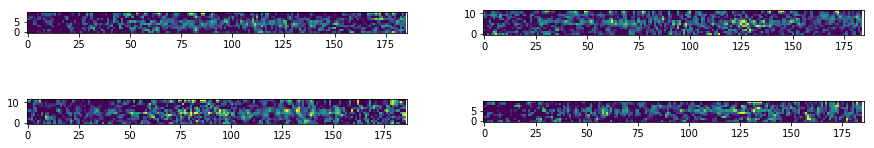

In [25]:
ID = 160

plt.rcParams["figure.figsize"] = (15,3)
plt.subplot(2,2,1)
try:
    d1 = fits.open("OUTPUT/ib6o23rsq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,2)
try:
    d1 = fits.open("OUTPUT/ib6o23ryq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,3)
try:
    d1 = fits.open("OUTPUT/ib6o23ruq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,4)
try:
    d1 = fits.open("OUTPUT/ib6o23s0q_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass



We now examine the calibrated 1D spectra of one of the sources:

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


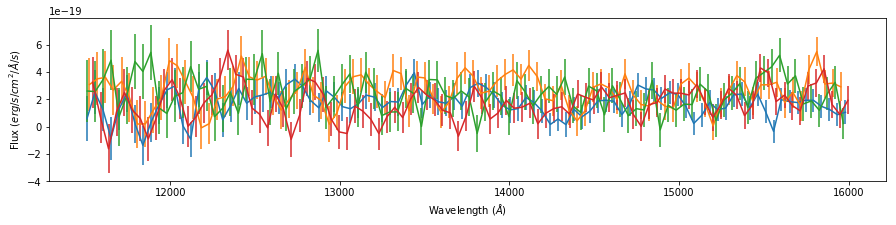

In [26]:
import glob
for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print s
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>11500) & (w<16000)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');

Contamination is not automatically removed but has been estimated and we can plot it

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


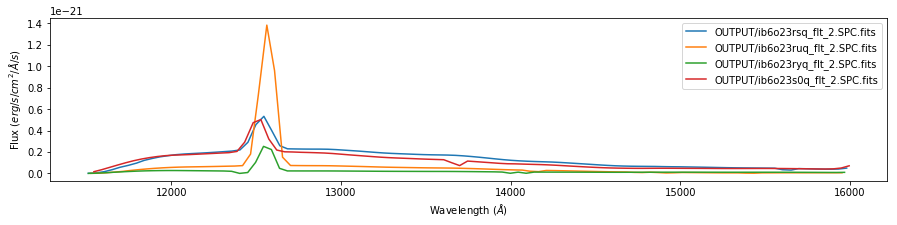

In [27]:
import glob
for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print s
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    c = d1["CONTAM"]
    vg = (w>11500) & (w<16000)
    plt.plot(w[vg],c[vg],label=s)
plt.legend()
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');

<h1>More advanced extraction

We now use the aXe Fluxcube extraction

- This method uses multiple mosaics, generated with the same WCS as the G141 mosaic and the SeXtractor segmentation file seg.fits which was generated above when we created the catalog, to generate more accurate contamination estimates and weighted extraction.
- The use of aXedrizzle allows us to combine 2D and 1D spectra taken at the same orientation, which is the case of the data in this example.
- In this example, we use the actual segmenation map to determine the shape of objects. This is done via a set of Fluxcube files was we need to first generate

We create a new directory called DRIZZLE that we will need:

In [28]:

if os.path.isdir("DRIZZLE"):
    shutil.rmtree("DRIZZLE")
os.mkdir("DRIZZLE")
os.environ['AXE_DRIZZLE_PATH'] = './DRIZZLE/' 
print '--> variable AXE_DRIZZLE_PATH  set to "./DRIZZLE/"'

--> variable AXE_DRIZZLE_PATH  set to "./DRIZZLE/"


We already have an F140W mosaic and we now create an F125W mosaic with the same final WCS as the G141 mosaic

In [29]:
os.chdir(cwd)

if os.path.isdir("F125W"):
    shutil.rmtree("F125W")

os.mkdir("F125W")


In [30]:
os.system("cp cookbook_data/F125W/*flt.fits F125W/")
os.system("cp cookbook_data/F125W/F125W.lis F125W/")
os.chdir("F125W")
!cat F125W.lis

ib6o03n9q_flt.fits
ib6o03nbq_flt.fits
ib6o03nfq_flt.fits
ib6o03niq_flt.fits
ib6o03nmq_flt.fits
ib6o03npq_flt.fits
ib6o04tuq_flt.fits
ib6o04twq_flt.fits
ib6o04u7q_flt.fits
ib6o04uaq_flt.fits
ib6o04ueq_flt.fits
ib6o04uwq_flt.fits
ib6o09h7q_flt.fits
ib6o09h9q_flt.fits
ib6o09hdq_flt.fits
ib6o09hwq_flt.fits
ib6o09i0q_flt.fits
ib6o09i3q_flt.fits
ib6oa8viq_flt.fits
ib6oa8vlq_flt.fits
ib6oa8vpq_flt.fits
ib6ob8vtq_flt.fits


In [31]:
ref = "../G141/G141_drz.fits[1]"
astrodrizzle.AstroDrizzle("@F125W.lis",output="F125W",in_memory=False,skysub="yes",build=True,driz_cr_corr=True,driz_cr=True,final_wcs=True,driz_separate=True,driz_sep_wcs=True,driz_sep_refimage=ref,final_refimage=ref)

INPUT_DICT: {'driz_separate': True, 'final_refimage': '../G141/G141_drz.fits[1]', 'final_wcs': True, 'skysub': 'yes', 'driz_cr_corr': True, 'driz_sep_refimage': '../G141/G141_drz.fits[1]', 'build': True, 'driz_cr': True, 'input': '@F125W.lis', 'in_memory': False, 'output': 'F125W', 'driz_sep_wcs': True}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.21(12-January-2018) started at: 17:17:57.180 (04/03/2019)

==== Processing Step  Initialization  started at  17:17:57.184 (04/03/2019)

Preserving original of:  ib6o03n9q_flt.fits as  OrIg_files/ib6o03n9q_flt.fits

Preserving original of:  ib6o03nbq_flt.fits as  OrIg_files/ib6o03nbq_flt.fits

Preserving original of:  ib6o03nfq_flt.fits as  OrIg_files/ib6o03nfq_flt.fits

Preserving original of:  ib6o03niq_flt.fits as  OrIg_files/ib6o03niq_flt.fits

Preserving original of:  ib6o03nmq_flt.fits as  OrIg_files/ib6o03nmq_flt.fits

Preserving original of:  ib6o03npq_flt.fits as  OrIg_files/ib6o03npq_flt.fits

Preserving original 


reference sky value for image  ib6oa8vlq_flt.fits  is  409.554338176

reference sky value for image  ib6oa8vpq_flt.fits  is  454.478009808

reference sky value for image  ib6ob8vtq_flt.fits  is  411.137837022



Saving output median image to:  F125W_med.fits

==== Processing Step  Create Median  finished at  17:18:23.27 (04/03/2019)

==== Processing Step  Blot  started at  17:18:23.282 (04/03/2019)

    Blot: creating blotted image:  ib6o03n9q_flt.fits[sci,1]

Using default C-based coordinate transformation...

-Generating simple FITS output: ib6o03n9q_sci1_blt.fits

Writing out image to disk: ib6o03n9q_sci1_blt.fits

    Blot: creating blotted image:  ib6o03nbq_flt.fits[sci,1]

Using default C-based coordinate transformation...

-Generating simple FITS output: ib6o03nbq_sci1_blt.fits

Writing out image to disk: ib6o03nbq_sci1_blt.fits

    Blot: creating blotted image:  ib6o03nfq_flt.fits[sci,1]

Using default C-based coordinate transformation...

-Generating simple FITS output: ib6o


            Static Mask          0.7280 sec.

           Subtract Sky          3.7495 sec.

       Separate Drizzle          1.6116 sec.

          Create Median          7.1699 sec.

                   Blot          12.7884 sec.

                Driz_CR          2.0934 sec.

          Final Drizzle          13.6486 sec.

   ====================          ====================

                  Total          54.6028 sec.

Trailer file written to:  astrodrizzle.log



We create a directory to prepare our Fluxcubes:

In [32]:
os.chdir(cwd)

if os.path.isdir("FLX"):
    shutil.rmtree("FLX")

os.mkdir("FLX")

Copy the direct imaging and G141 mosaic in the Fluxcube directory:

In [33]:
os.chdir("FLX")

os.system("cp ../F125W/F125W_drz.fits ./")
os.system("cp ../F140W/F140W_drz.fits ./")
os.system("cp ../G141/G141_drz.fits ./")

0

We will need access to the G141 FLT files, and copy them here instead of working in the ./DATA directory

In [34]:
os.system("cp ../DATA/*flt.fits .")

0

We also need the segmenation file we created earlier. Here we copy one we already prepared.

In [35]:
os.system("cp ../cookbook_data/catalog/seg.fits .")

0

Create a cubelist.lis file that contains a description of the mosaics we are using and populates the PHOTPLAM and AB magnitude zeropoints

In [36]:
import glob

dir_images = []
for dir_image in glob.glob("F*drz.fits"):
    print dir_image
    fname = dir_image.split("_")[0]
    dir_images.append(dir_image)
        
s = []
for dir_image in dir_images:
    print dir_image  
    PHOTPLAM = fits.open(dir_image)[0].header["PHOTPLAM"] # Wavelength of filter in A
    PHOTFLAM = fits.open(dir_image)[0].header["PHOTFLAM"] # Wavelength of filter in A
    ABZP = -48.60 - 2.5*np.log10(PHOTFLAM * PHOTPLAM**2/3e8/1e10 )
    ss = "%s, %f, %f\n" % (dir_image, PHOTPLAM/10., ABZP)
    s.append(ss)
open("cubelist.lis","w").writelines(s)
    

F125W_drz.fits
F140W_drz.fits
F125W_drz.fits
F140W_drz.fits


In [37]:
!cat cubelist.lis

F125W_drz.fits, 1248.606000, 26.231020
F140W_drz.fits, 1392.290700, 26.453120


We now can create the Flexcube

This will combined the mosaics and segmentation file into a flexcube that can be used to compute the contamination and perform the extraction. A different one is generated for each G141 FLT file

In [38]:
iraf.fcubeprep.grism_image = os.path.join("G141_drz.fits")
iraf.fcubeprep.segm_image = os.path.join("seg.fits")
iraf.fcubeprep.filter_info = "cubelist.lis"
iraf.fcubeprep.AB_zero = "yes"
iraf.fcubeprep.useMdriz = "no"
iraf.fcubeprep.dimension_info = dimension_info
iraf.fcubeprep.run(mode="h")

 image_name: F125W_drz.fits
 segm_image: seg.fits
 flux_name: F125W_drz.FLX.fits

F125W_drz.fits[SCI]  -->  F125W_drz.FLX.fits

 image_name: F140W_drz.fits
 segm_image: seg.fits
 flux_name: F140W_drz.FLX.fits

F140W_drz.fits[SCI]  -->  F140W_drz.FLX.fits

Creating  ib6o23rsq_flt_2.FLX.fits  ... 

/Users/npirzkal/anaconda3/envs/axe-wfc3/lib/python2.7/site-packages/drizzlepac/ablot.py:369: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  _outsci = np.zeros((blot_wcs._naxis2,blot_wcs._naxis1),dtype=np.float32)


Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
 Done
Creating  ib6o23ruq_flt_2.FLX.fits  ... Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
 Done
Creating  ib6o23ryq_flt_2.FLX.fits  ... Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
 Done
Creating  ib6o23s0q_flt_2.FLX.fits  ... Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based

At this point, we should have generated 2 master FLX file, one for each input imaging mosaic, and four FLX files, one for each of our G141 FLT file.


In [39]:
!ls *FLX.fits

F125W_drz.FLX.fits       ib6o23rsq_flt_2.FLX.fits ib6o23ryq_flt_2.FLX.fits
F140W_drz.FLX.fits       ib6o23ruq_flt_2.FLX.fits ib6o23s0q_flt_2.FLX.fits


The FLX files are created in the current directory but we need them to be in the DATA directoty so we copy them there



In [40]:
os.system("cp ib6o23*FLX.fits ../DATA/")

0

413.0


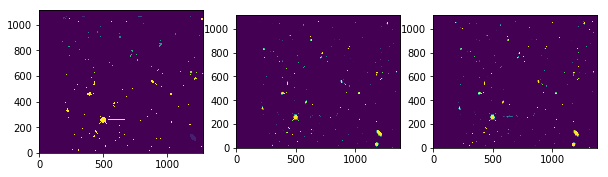

In [41]:
plt.rcParams["figure.figsize"] = (10,7)

plt.subplot(1,3,1)
print np.max(fits.open("ib6o23ryq_flt_2.FLX.fits")[1].data)

im = plt.imshow(fits.open("ib6o23ryq_flt_2.FLX.fits")["SEGM"].data*1.,origin="corner")
im.set_clim(0,199)

plt.subplot(1,3,2)
im = plt.imshow(fits.open("ib6o23ryq_flt_2.FLX.fits")["LAMBDA1248"].data,origin="corner")
im.set_clim(0,1e-20)

plt.subplot(1,3,3)
im = plt.imshow(fits.open("ib6o23ryq_flt_2.FLX.fits")["LAMBDA1392"].data,origin="corner")
im.set_clim(0,1e-20)

#reload(nf)
#nf.disp("ib6o23ryq_flt_2.FLX.fits[SEGM]",1,z1=0,z2=1)
# nf.disp("ib6o23ryq_flt_2.FLX.fits[2]",2,z1=0,z2=3e-18)
# nf.disp("ib6o23ryq_flt_2.FLX.fits[3]",3,z1=0,z2=1e-18)

We want to work on the non background subtracted G141 data. The ones in the DATA directory have already been subtracted during our basic extraction, so we copy the original G141 data back into the DATA directory.

In [42]:
os.chdir(cwd)

os.system("cp G141/*flt.fits DATA/")

0

We run aXeprep on the data. This step also substracts the background.

In [43]:
iraf.axeprep.inlist = "aXe.lis"
iraf.axeprep.configs = "G141.F140W.V4.31.conf"
iraf.axeprep.backgr = "yes"
iraf.axeprep.backims = "WFC3.IR.G141.sky.V1.0.fits"
iraf.axeprep.norm = "no"
iraf.axeprep.mfwhm = 3.0
iraf.axeprep.run(mode='h')


Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1.

     Done
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23ruq_flt.fits', 'ib6o23ruq_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23ruq_flt.fits[SCI,1] sky-subtracted.

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.01565745989535823

     Done
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23s0q_flt.fits', 'ib6o23s0q_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23s0q_flt.fits[SCI,1] sky-subtracted.


Checking the background levels that were subtracted from each fo the G141 FLT files

In [44]:
!cat aXe.lis
print fits.open("DATA/ib6o23rsq_flt.fits")[1].header["SKY_CPS"],"e/s"
print fits.open("DATA/ib6o23ruq_flt.fits")[1].header["SKY_CPS"],"e/s"
print fits.open("DATA/ib6o23ryq_flt.fits")[1].header["SKY_CPS"],"e/s"
print fits.open("DATA/ib6o23s0q_flt.fits")[1].header["SKY_CPS"],"e/s"

ib6o23rsq_flt.fits ib6o23rtq_flt_1.cat ib6o23rtq_flt.fits
ib6o23ruq_flt.fits ib6o23rwq_flt_1.cat ib6o23rwq_flt.fits
ib6o23ryq_flt.fits ib6o23rzq_flt_1.cat ib6o23rzq_flt.fits
ib6o23s0q_flt.fits ib6o23s2q_flt_1.cat ib6o23s2q_flt.fits

0.8667519 e/s
0.9321785 e/s
0.8834052 e/s
0.8736298 e/s


We run axecore using the flexcube models

In [45]:
iraf.axecore.inlist = "aXe.lis"
iraf.axecore.configs = "G141.F140W.V4.31.conf"
iraf.axecore.extrfwhm = 4.0
iraf.axecore.drzfwhm = 3.0
iraf.axecore.back = 'no'
iraf.axecore.backfwhm = 4.0
iraf.axecore.orient = 'no'
iraf.axecore.weights = 'yes'
iraf.axecore.slitless_geom = 'no'
iraf.axecore.cont_model = 'fluxcube'
iraf.axecore.sampling = 'drizzle'
iraf.axecore.run(mode='h')


Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1.

 Setting up output name:  ib6o23rsq_drz.fits
Starting PyDrizzle Version  6.4.3  at  17:19:22 (04/03/2019)

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.

     Done
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=4.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=0', '-orient=0']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_AF2PET', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_PETCONT', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-cont_model=3', '-inter_type=1', '-model_scale=3.0', '-lambda_psf=800.0', '-cont_map']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_PETFF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_PET2SPC', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-noBPET', '-opt_weights']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_STAMPS', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', 

 Setting up output name:  ib6o23s0q_drz.fits
Starting PyDrizzle Version  6.4.3  at  17:20:50 (04/03/2019)

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.

Now we use aXedrizzle to combine the dithered observations into single 2D and 1D spectra.
We first run the drzprep routine and then the axedrizzle task. The latter will take several minutes to run.

In [46]:
iraf.drzprep.inlist = "aXe.lis"
iraf.drzprep.configs =  "G141.F140W.V4.31.conf"
iraf.drzprep.back = 'no'
iraf.drzprep.run(mode='h')

['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_DRZPREP', 'aXe.lis', 'G141.F140W.V4.31.conf']


In [47]:
iraf.axedrizzle.inlist = "aXe.lis"
iraf.axedrizzle.configs = "G141.F140W.V4.31.conf"
iraf.axedrizzle.infwhm = 4.0
iraf.axedrizzle.outfwhm = 3.0
iraf.axedrizzle.back = 'no'
iraf.axedrizzle.driz_separate = 'yes'
iraf.axedrizzle.combine_nsigmas = "4.0 3.0"
iraf.axedrizzle.driz_cr_snr = "5.0 4.0"
iraf.axedrizzle.driz_cr_grow = 1
iraf.axedrizzle.driz_cr_scale = "1.2 0.7"

iraf.axedrizzle.run(mode="h")

Creating temporary directory:  ./DRIZZLE/tmp

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.

 
Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1

['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_FILET', 'ib6o23ryq_flt_2.DPP.fits', '-drztmp=./DRIZZLE/tmp/ib6o23ryq_flt_2']
['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_FILET', 'ib6o23s0q_flt_2.DPP.fits', '-drztmp=./DRIZZLE/tmp/ib6o23s0q_flt_2']

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.788384985

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID58.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID58.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID58.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID58.OBJ/ib6o23s0q_flt_2_flt_ID58.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID58.OBJ/ib6o23s0q_flt_2_blt_ID58.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,    2046 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID58.OBJ/ib6o23s0q_flt_2_blt_ID58.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID58.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID58.OBJ/ib6o23ryq_flt_2_flt_ID58.coeffs
-Created new

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     189 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID54.OBJ/ib6o23ryq_flt_2_blt_ID54.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID54.OBJ/ib6o23s0q_flt_2_blt_ID54.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID54.OBJ/ib6o23ryq_flt_2_blt_ID54.fits
MultiDrizzling object :       ID55 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23s0q_flt_2_flt_ID55.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID55.OBJ/ib6o23s0q_flt_2_flt_ID55.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23s0q_flt_2_wht_ID55.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23s0q_flt_2_single_sci_ID55.fits
-Cr

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID57.fits

Number of images to flatten: 1!
Set combine type to "minimum"!
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID57.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID57.OBJ/ib6o23s0q_flt_2_flt_ID57.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID57.OBJ/ib6o23s0q_flt_2_blt_ID57.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   1002.935 Output exposure:   1002.935
! Warning,     164 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID57.OBJ/ib6o23s0q_flt_2_blt_ID57.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID57.OBJ/ib6o23s0q_flt_2_blt_ID57.fits
MultiDrizzling object :       ID50 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_flt_ID50.fits

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23ryq_flt_2_flt_ID52.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID52.OBJ/ib6o23ryq_flt_2_flt_ID52.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23ryq_flt_2_wht_ID52.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23ryq_flt_2_single_sci_ID52.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23ryq_flt_2_single_wht_ID52.fits
! Warning, output context image will not be saved
! Warning,       169 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23ryq_flt_2_single_sci_ID52.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23ryq_flt_2_single_wht_ID52.fits
Done!
tmp_mean_value set to 0; pos

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID130.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID130.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID130.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID130.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID130.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID130.OBJ/ib6o23s0q_flt_2_flt_ID130.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23s0q_flt_2_blt_ID130.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     474 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID131.OBJ/ib6o23rsq_flt_2_flt_ID131.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23rsq_flt_2_blt_ID131.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     457 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23rsq_flt_2_blt_ID131.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID131.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ruq_flt_2_flt_ID131.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ruq_flt_2_blt_ID131.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     472 points were outsi

-Writing output blotted image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ruq_flt_2_blt_ID132.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID132.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_flt_ID132.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_blt_ID132.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     364 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_blt_ID132.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID132.OBJ/ib6o23s0q_flt_2_blt_ID132.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID132.OBJ/ib6o23rsq_flt_2_blt_ID132.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID132.OBJ/ib6o23ruq_flt_2_blt_ID132.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_blt_ID132.fit

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID134.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID134.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID134.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID134.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID134.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID134.OBJ/ib6o23s0q_flt_2_flt_ID134.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23s0q_flt_2_blt_ID134.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     388 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID135.OBJ/ib6o23rsq_flt_2_flt_ID135.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23rsq_flt_2_blt_ID135.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     359 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23rsq_flt_2_blt_ID135.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID135.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ruq_flt_2_flt_ID135.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ruq_flt_2_blt_ID135.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     309 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID136.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_flt_ID136.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_blt_ID136.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     549 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_blt_ID136.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID136.OBJ/ib6o23s0q_flt_2_blt_ID136.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID136.OBJ/ib6o23rsq_flt_2_blt_ID136.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID136.OBJ/ib6o23ruq_flt_2_blt_ID136.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_blt_ID136.fits
MultiDrizzling object :      ID137 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID138.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID138.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID138.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID138.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID138.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID138.OBJ/ib6o23s0q_flt_2_flt_ID138.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23s0q_flt_2_blt_ID138.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     811 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID29.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID29.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID29.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID29.OBJ/ib6o23s0q_flt_2_flt_ID29.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23s0q_flt_2_blt_ID29.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,    2861 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23s0q_flt_2_blt_ID29.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID29.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_flt_ID29.coeffs
-Created new

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     251 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_blt_ID21.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID21.OBJ/ib6o23s0q_flt_2_blt_ID21.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_blt_ID21.fits
MultiDrizzling object :       ID20 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID20.OBJ/ib6o23rsq_flt_2_flt_ID20.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID20.OBJ/ib6o23rsq_flt_2_flt_ID20.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID20.OBJ/ib6o23rsq_flt_2_wht_ID20.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID20.OBJ/ib6o23rsq_flt_2_single_sci_ID20.fits
-Cr

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_flt_ID22.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_flt_ID22.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_wht_ID22.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_single_sci_ID22.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_single_wht_ID22.fits
! Warning, output context image will not be saved
! Warning,        56 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_single_sci_ID22.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_single_wht_ID22.fits
Done!
tmp_mean_value set to 0; pos

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID24.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID24.OBJ/ib6o23s0q_flt_2_flt_ID24.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID24.OBJ/ib6o23s0q_flt_2_blt_ID24.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      80 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID24.OBJ/ib6o23s0q_flt_2_blt_ID24.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID24.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID24.OBJ/ib6o23ryq_flt_2_flt_ID24.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID24.OBJ/ib6o23ryq_flt_2_blt_ID24.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output expo

Running quickDeriv on  ./DRIZZLE/tmp/ID26.OBJ/ib6o23s0q_flt_2_blt_ID26.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID26.OBJ/ib6o23ryq_flt_2_blt_ID26.fits
MultiDrizzling object :      ID145 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_flt_ID145.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_flt_ID145.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_wht_ID145.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_single_sci_ID145.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_single_wht_ID145.fits
! Warning, output context image will not be saved
! Warning,       116 points were outside the output image.
-Writing output d

-Opening coefficients file: ./DRIZZLE/tmp/ID144.OBJ/ib6o23s0q_flt_2_flt_ID144.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23s0q_flt_2_blt_ID144.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     774 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23s0q_flt_2_blt_ID144.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID144.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID144.OBJ/ib6o23rsq_flt_2_flt_ID144.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23rsq_flt_2_blt_ID144.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     743 points were outsi

-Writing output blotted image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23rsq_flt_2_blt_ID147.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID147.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ruq_flt_2_flt_ID147.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ruq_flt_2_blt_ID147.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     213 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ruq_flt_2_blt_ID147.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID147.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_flt_ID147.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_blt_ID147.fits
! Warning, unable to read CTYPE1 from

-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     333 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_blt_ID146.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID146.OBJ/ib6o23s0q_flt_2_blt_ID146.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID146.OBJ/ib6o23rsq_flt_2_blt_ID146.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID146.OBJ/ib6o23ruq_flt_2_blt_ID146.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_blt_ID146.fits
MultiDrizzling object :      ID141 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID141.OBJ/ib6o23s0q_flt_2_flt_ID141.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID141.OBJ/ib6o23s0q_flt_2_flt_ID141.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID141.OBJ/ib6o23s0q_flt_2_wht_ID141.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID140.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID140.OBJ/ib6o23s0q_flt_2_flt_ID140.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23s0q_flt_2_blt_ID140.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     871 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23s0q_flt_2_blt_ID140.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID140.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_flt_ID140.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_blt_ID140.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

-Writing output blotted image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_blt_ID143.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID143.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ruq_flt_2_flt_ID143.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ruq_flt_2_blt_ID143.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     446 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ruq_flt_2_blt_ID143.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID143.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ryq_flt_2_flt_ID143.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ryq_flt_2_blt_ID143.fits
! Warning, unable to read CTYPE1 from

-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     582 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23ryq_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23s0q_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23ruq_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23ryq_flt_2_blt_ID142.fits
MultiDrizzling object :      ID149 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23s0q_flt_2_flt_ID149.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID149.OBJ/ib6o23s0q_flt_2_flt_ID149.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23s0q_flt_2_wht_ID149.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID148.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID148.OBJ/ib6o23s0q_flt_2_flt_ID148.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23s0q_flt_2_blt_ID148.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     294 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_flt_ID361.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_blt_ID361.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     241 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_blt_ID361.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID361.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID361.OBJ/ib6o23ruq_flt_2_flt_ID361.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23ruq_flt_2_blt_ID361.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     294 points were outsi

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID360.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID360.OBJ/ib6o23ryq_flt_2_flt_ID360.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23ryq_flt_2_blt_ID360.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      82 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23ryq_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23s0q_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23ruq_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23ryq_flt_2_blt_ID360.fits
MultiDrizzling object :      ID363 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID362.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID362.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID362.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID362.OBJ/ib6o23s0q_flt_2_flt_ID362.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23s0q_flt_2_blt_ID362.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     175 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23s0q_flt_2_blt_ID362.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID362.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_flt_ID362.coeffs


Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23s0q_flt_2_blt_ID365.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23rsq_flt_2_blt_ID365.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23ruq_flt_2_blt_ID365.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_blt_ID365.fits
MultiDrizzling object :      ID364 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_flt_ID364.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_flt_ID364.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_wht_ID364.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_single_sci_ID364.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID364.OBJ/ib6o

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID367.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID367.OBJ/ib6o23s0q_flt_2_flt_ID367.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23s0q_flt_2_blt_ID367.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1102 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23s

! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      74 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23rsq_flt_2_blt_ID366.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID366.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ruq_flt_2_flt_ID366.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ruq_flt_2_blt_ID366.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      22 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ruq_flt_2_blt_ID366.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID366.fits
-Opening 

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID368.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID368.OBJ/ib6o23s0q_flt_2_flt_ID368.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23s0q_flt_2_blt_ID368.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     638 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_flt_ID248.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_blt_ID248.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     432 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_blt_ID248.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID248.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23ruq_flt_2_flt_ID248.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23ruq_flt_2_blt_ID248.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     485 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID249.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_flt_ID249.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_blt_ID249.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     187 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23s0q_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23ruq_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_blt_ID249.fits
MultiDrizzling object :      ID246 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID247.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID247.OBJ/ib6o23s0q_flt_2_flt_ID247.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23s0q_flt_2_blt_ID247.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2373 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_flt_ID244.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_blt_ID244.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     332 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_blt_ID244.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID244.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID244.OBJ/ib6o23ruq_flt_2_flt_ID244.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23ruq_flt_2_blt_ID244.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     364 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID245.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_flt_ID245.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_blt_ID245.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     216 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23s0q_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23ruq_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_blt_ID245.fits
MultiDrizzling object :      ID242 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID243.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID243.OBJ/ib6o23s0q_flt_2_flt_ID243.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23s0q_flt_2_blt_ID243.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     395 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_flt_ID240.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_blt_ID240.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     631 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_blt_ID240.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID240.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID240.OBJ/ib6o23ruq_flt_2_flt_ID240.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23ruq_flt_2_blt_ID240.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     498 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID241.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_flt_ID241.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_blt_ID241.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     151 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23s0q_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23ruq_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_blt_ID241.fits
MultiDrizzling object :       ID89 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID88.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID88.OBJ/ib6o23s0q_flt_2_flt_ID88.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23s0q_flt_2_blt_ID88.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     979 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_blt_ID83.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     313 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_blt_ID83.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID83.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_flt_ID83.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_blt_ID83.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     359 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23ryq_flt_2_blt_ID82.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     545 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23ryq_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23s0q_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23ruq_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23ryq_flt_2_blt_ID82.fits
MultiDrizzling object :       ID81 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23s0q_flt_2_flt_ID81.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID81.OBJ/ib6o23s0q_flt_2_flt_ID81.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID81

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID80.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID80.OBJ/ib6o23s0q_flt_2_flt_ID80.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23s0q_flt_2_blt_ID80.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     674 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_blt_ID87.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     622 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_blt_ID87.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID87.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_flt_ID87.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_blt_ID87.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     309 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23ryq_flt_2_blt_ID86.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     611 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23ryq_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23s0q_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23ruq_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23ryq_flt_2_blt_ID86.fits
MultiDrizzling object :       ID85 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23s0q_flt_2_flt_ID85.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID85.OBJ/ib6o23s0q_flt_2_flt_ID85.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID85

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID84.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID84.OBJ/ib6o23s0q_flt_2_flt_ID84.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23s0q_flt_2_blt_ID84.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1068 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23s0q_flt_2_b

-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_flt_ID109.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_blt_ID109.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     330 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_blt_ID109.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID109.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23ruq_flt_2_flt_ID109.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23ruq_flt_2_blt_ID109.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     221 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID108.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_flt_ID108.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_blt_ID108.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     375 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23s0q_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23ruq_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_blt_ID108.fits
MultiDrizzling object :      ID101 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID100.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID100.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID100.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID100.OBJ/ib6o23s0q_flt_2_flt_ID100.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23s0q_flt_2_blt_ID100.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      60 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23s0q_flt_2_blt_ID100.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID100.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_flt_ID100.coeffs


! Warning,     353 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23s0q_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23rsq_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23ruq_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_blt_ID103.fits
MultiDrizzling object :      ID102 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID102.OBJ/ib6o23s0q_flt_2_flt_ID102.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID102.OBJ/ib6o23s0q_flt_2_flt_ID102.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID102.OBJ/ib6o23s0q_flt_2_wht_ID102.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new out

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_flt_ID104.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_flt_ID104.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_wht_ID104.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_sci_ID104.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_wht_ID104.fits
! Warning, output context image will not be saved
! Warning,       293 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_sci_ID104.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_wht_ID104.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID107.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID107.OBJ/ib6o23s0q_flt_2_flt_ID107.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23s0q_flt_2_blt_ID107.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2059 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23rsq_flt_2_flt_ID106.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23rsq_flt_2_blt_ID106.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     387 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23rsq_flt_2_blt_ID106.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID106.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ruq_flt_2_flt_ID106.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ruq_flt_2_blt_ID106.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     412 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID12.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_flt_ID12.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_blt_ID12.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_blt_ID12.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID12.OBJ/ib6o23rsq_flt_2_blt_ID12.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_blt_ID12.fits
MultiDrizzling object :       ID13 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_wht_I

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     227 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23rsq_flt_2_blt_ID15.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID15.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_flt_ID15.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_blt_ID15.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     258 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_blt_ID15.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID15.OBJ/ib6o23rsq_flt_2_blt_ID15.fit

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_flt_ID18.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_flt_ID18.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_wht_ID18.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_sci_ID18.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_wht_ID18.fits
! Warning, output context image will not be saved
! Warning,       127 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_sci_ID18.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_wht_ID18.fits
Done!
tmp_mean_value set to 0; pos

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID202.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID202.OBJ/ib6o23s0q_flt_2_flt_ID202.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23s0q_flt_2_blt_ID202.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     251 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23rsq_flt_2_flt_ID203.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23rsq_flt_2_blt_ID203.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     545 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23rsq_flt_2_blt_ID203.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID203.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ruq_flt_2_flt_ID203.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ruq_flt_2_blt_ID203.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     324 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID200.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_flt_ID200.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_blt_ID200.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     347 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23s0q_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23rsq_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23ruq_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_blt_ID200.fits
MultiDrizzling object :      ID201 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID206.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID206.OBJ/ib6o23s0q_flt_2_flt_ID206.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23s0q_flt_2_blt_ID206.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     648 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23rsq_flt_2_flt_ID207.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23rsq_flt_2_blt_ID207.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     477 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23rsq_flt_2_blt_ID207.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID207.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ruq_flt_2_flt_ID207.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ruq_flt_2_blt_ID207.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     525 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID204.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_flt_ID204.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_blt_ID204.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     334 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23s0q_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23rsq_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23ruq_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_blt_ID204.fits
MultiDrizzling object :      ID205 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID208.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID208.OBJ/ib6o23s0q_flt_2_flt_ID208.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23s0q_flt_2_blt_ID208.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1942 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23rsq_flt_2_flt_ID209.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23rsq_flt_2_blt_ID209.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     527 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23rsq_flt_2_blt_ID209.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID209.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ruq_flt_2_flt_ID209.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ruq_flt_2_blt_ID209.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     623 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID338.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_flt_ID338.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_blt_ID338.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     355 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23s0q_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23rsq_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23ruq_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_blt_ID338.fits
MultiDrizzling object :      ID339 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID336.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID336.OBJ/ib6o23s0q_flt_2_flt_ID336.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23s0q_flt_2_blt_ID336.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     272 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID337.OBJ/ib6o23rsq_flt_2_flt_ID337.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23rsq_flt_2_blt_ID337.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1537 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23rsq_flt_2_blt_ID337.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID337.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ruq_flt_2_flt_ID337.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ruq_flt_2_blt_ID337.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     555 points were outsi

! Warning,    1213 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ruq_flt_2_blt_ID334.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID334.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_blt_ID334.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     327 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_blt_ID334.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID334.OBJ/ib6o23s0q_flt_2_blt_ID334.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID334.OBJ/ib6o23rsq_flt_2_blt_ID334.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID334.OBJ/ib6o23ruq_flt_2_blt_ID334.fits
Running quickDeriv 

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID332.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID332.OBJ/ib6o23s0q_flt_2_flt_ID332.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23s0q_flt_2_blt_ID332.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     282 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID330.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID330.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID330.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID330.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_flt_ID330.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_blt_ID330.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     430 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23rsq_flt_2_blt_ID331.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      27 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23rsq_flt_2_blt_ID331.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID331.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ruq_flt_2_flt_ID331.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ruq_flt_2_blt_ID331.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     217 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ruq

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID47.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_flt_ID47.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_blt_ID47.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      63 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_blt_ID47.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID47.OBJ/ib6o23s0q_flt_2_blt_ID47.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_blt_ID47.fits
MultiDrizzling object :       ID46 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID46.OBJ/ib6o23s0q_flt_2_flt_ID46.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID46.OBJ/ib6o23s0q_flt_2_flt_ID46.coeffs
-Opening

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID43.fits

Number of images to flatten: 1!
Set combine type to "minimum"!
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID43.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_flt_ID43.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_blt_ID43.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   1002.935 Output exposure:   1002.935
-Writing output blotted image: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_blt_ID43.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_blt_ID43.fits
MultiDrizzling object :       ID42 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID42.OBJ/ib6o23s0q_flt_2_flt_ID42.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID42.OBJ/ib6o2

-Opening coefficients file: ./DRIZZLE/tmp/ID382.OBJ/ib6o23rsq_flt_2_flt_ID382.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23rsq_flt_2_blt_ID382.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     728 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23rsq_flt_2_blt_ID382.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID382.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_flt_ID382.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_blt_ID382.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRI

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID387.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID387.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID387.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID387.OBJ/ib6o23rsq_flt_2_flt_ID387.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23rsq_flt_2_blt_ID387.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     190 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23rsq_flt_2_blt_ID387.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID387.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_flt_ID387.coeffs


-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_blt_ID385.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID385.OBJ/ib6o23rsq_flt_2_blt_ID385.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_blt_ID385.fits
MultiDrizzling object :      ID384 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID384.OBJ/ib6o23rsq_flt_2_flt_ID384.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID384.OBJ/ib6o23rsq_flt_2_flt_ID384.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID384.OBJ/ib6o23rsq_flt_2_wht_ID384.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID384.OBJ/ib6o23rsq_flt_2_single_sci_ID384.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID384.OBJ/ib6o23rsq_flt_2_si

-Created new output data image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_blt_ID156.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     201 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_blt_ID156.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID156.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID156.OBJ/ib6o23rsq_flt_2_flt_ID156.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23rsq_flt_2_blt_ID156.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     249 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23rsq

MultiDrizzling object :      ID154 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_flt_ID154.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_flt_ID154.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_wht_ID154.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_single_sci_ID154.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_single_wht_ID154.fits
! Warning, output context image will not be saved
! Warning,       223 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_single_sci_ID154.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_si

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID155.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID155.OBJ/ib6o23s0q_flt_2_flt_ID155.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23s0q_flt_2_blt_ID155.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1768 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_flt_ID152.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_blt_ID152.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     824 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_blt_ID152.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID152.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID152.OBJ/ib6o23ruq_flt_2_flt_ID152.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23ruq_flt_2_blt_ID152.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     409 points were outsi

-Writing output blotted image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ruq_flt_2_blt_ID153.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID153.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_flt_ID153.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_blt_ID153.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     203 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23s0q_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23ruq_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_blt_ID153.fit

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID151.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID151.OBJ/ib6o23s0q_flt_2_flt_ID151.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23s0q_flt_2_blt_ID151.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     549 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_flt_ID158.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_blt_ID158.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     463 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_blt_ID158.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID158.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID158.OBJ/ib6o23ruq_flt_2_flt_ID158.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23ruq_flt_2_blt_ID158.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     299 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID159.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_flt_ID159.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_blt_ID159.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     184 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23s0q_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23ruq_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_blt_ID159.fits
MultiDrizzling object :      ID373 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID370.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID370.OBJ/ib6o23s0q_flt_2_flt_ID370.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23s0q_flt_2_blt_ID370.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     101 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23s

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID371.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_flt_ID371.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_blt_ID371.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     741 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_blt_ID371.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID371.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_flt_ID371.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_blt_ID371.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_flt_ID375.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_flt_ID375.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_wht_ID375.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_sci_ID375.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_wht_ID375.fits
! Warning, output context image will not be saved
! Warning,       139 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_sci_ID375.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_wht_ID375.fits
+ DRIZZLE Version 3.

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID378.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID378.OBJ/ib6o23rsq_flt_2_flt_ID378.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23rsq_flt_2_blt_ID378.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     684 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23rsq_flt_2_blt_ID378.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID378.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_flt_ID378.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_blt_ID378.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID279.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID279.OBJ/ib6o23s0q_flt_2_flt_ID279.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23s0q_flt_2_blt_ID279.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2430 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_flt_ID278.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_blt_ID278.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     191 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_blt_ID278.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID278.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ruq_flt_2_flt_ID278.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ruq_flt_2_blt_ID278.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     819 points were outsi

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID273.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_flt_ID273.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_blt_ID273.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      93 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23s0q_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23rsq_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23ruq_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_blt_ID273.fits
MultiDrizzling object :      ID272 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID271.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID271.OBJ/ib6o23s0q_flt_2_flt_ID271.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23s0q_flt_2_blt_ID271.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1185 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ruq_flt_2_flt_ID277.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ruq_flt_2_flt_ID277.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ruq_flt_2_wht_ID277.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ruq_flt_2_single_sci_ID277.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ruq_flt_2_single_wht_ID277.fits
! Warning, output context image will not be saved
! Warning,       775 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ruq_flt_2_single_sci_ID277.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ruq_flt_2_single_wht_ID277.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID276.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID276.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID276.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID276.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID276.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID276.OBJ/ib6o23s0q_flt_2_flt_ID276.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23s0q_flt_2_blt_ID276.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     280 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID275.OBJ/ib6o23rsq_flt_2_flt_ID275.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23rsq_flt_2_blt_ID275.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     744 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23rsq_flt_2_blt_ID275.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID275.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ruq_flt_2_flt_ID275.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ruq_flt_2_blt_ID275.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     487 points were outsi

-Opening coefficients file: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_flt_ID274.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_blt_ID274.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     100 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_blt_ID274.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID274.OBJ/ib6o23s0q_flt_2_blt_ID274.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID274.OBJ/ib6o23rsq_flt_2_blt_ID274.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID274.OBJ/ib6o23ruq_flt_2_blt_ID274.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_blt_ID274.fits
MultiDrizzling object :      ID181 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23s0q_flt_2_flt_ID181.fits
-Opening coefficients f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID180.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID180.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID180.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID180.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID180.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID180.OBJ/ib6o23s0q_flt_2_flt_ID180.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23s0q_flt_2_blt_ID180.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     426 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID183.OBJ/ib6o23rsq_flt_2_flt_ID183.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23rsq_flt_2_blt_ID183.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1266 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23rsq_flt_2_blt_ID183.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID183.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ruq_flt_2_flt_ID183.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ruq_flt_2_blt_ID183.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     158 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID182.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_flt_ID182.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_blt_ID182.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     283 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_blt_ID182.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID182.OBJ/ib6o23s0q_flt_2_blt_ID182.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID182.OBJ/ib6o23rsq_flt_2_blt_ID182.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID182.OBJ/ib6o23ruq_flt_2_blt_ID182.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_blt_ID182.fits
MultiDrizzling object :      ID184 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID187.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID187.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID187.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID187.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID187.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID187.OBJ/ib6o23s0q_flt_2_flt_ID187.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23s0q_flt_2_blt_ID187.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     436 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID186.OBJ/ib6o23rsq_flt_2_flt_ID186.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23rsq_flt_2_blt_ID186.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     232 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23rsq_flt_2_blt_ID186.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID186.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ruq_flt_2_flt_ID186.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ruq_flt_2_blt_ID186.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     267 points were outsi

-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     629 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID188.OBJ/ib6o23s0q_flt_2_blt_ID188.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID188.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_flt_ID188.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_blt_ID188.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     588 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_blt_ID188.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID188.OBJ/ib6o23s0q_flt_2_blt_ID188.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_blt_ID188.fits
MultiDrizzling object :      ID118 ...  +

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID119.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID119.OBJ/ib6o23s0q_flt_2_flt_ID119.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23s0q_flt_2_blt_ID119.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     527 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_flt_ID113.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_flt_ID113.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_wht_ID113.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_sci_ID113.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_wht_ID113.fits
! Warning, output context image will not be saved
! Warning,       168 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_sci_ID113.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_wht_ID113.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID110.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID110.OBJ/ib6o23s0q_flt_2_flt_ID110.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23s0q_flt_2_blt_ID110.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     358 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_flt_ID111.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_blt_ID111.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     370 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_blt_ID111.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID111.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ruq_flt_2_flt_ID111.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ruq_flt_2_blt_ID111.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     206 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID116.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_flt_ID116.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_blt_ID116.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     418 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23s0q_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23rsq_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23ruq_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_blt_ID116.fits
MultiDrizzling object :      ID117 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID115.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID115.OBJ/ib6o23s0q_flt_2_flt_ID115.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23s0q_flt_2_blt_ID115.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     364 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23s

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID239.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_flt_ID239.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_blt_ID239.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1526 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_blt_ID239.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID239.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ruq_flt_2_flt_ID239.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ruq_flt_2_blt_ID239.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

-Writing output blotted image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ruq_flt_2_blt_ID238.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID238.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_flt_ID238.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_blt_ID238.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     282 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23s0q_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23rsq_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23ruq_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_blt_ID238.fit

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID236.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_flt_ID236.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_blt_ID236.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     605 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_flt_ID234.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_blt_ID234.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     471 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_blt_ID234.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID234.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ruq_flt_2_flt_ID234.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ruq_flt_2_blt_ID234.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     318 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID233.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_flt_ID233.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_blt_ID233.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     493 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23s0q_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23rsq_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23ruq_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_blt_ID233.fits
MultiDrizzling object :      ID232 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID231.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID231.OBJ/ib6o23s0q_flt_2_flt_ID231.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23s0q_flt_2_blt_ID231.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     290 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_flt_ID230.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_blt_ID230.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     338 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_blt_ID230.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID230.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ruq_flt_2_flt_ID230.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ruq_flt_2_blt_ID230.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     461 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID309.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_flt_ID309.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_blt_ID309.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     215 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23s0q_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23rsq_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23ruq_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_blt_ID309.fits
MultiDrizzling object :      ID308 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID303.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID303.OBJ/ib6o23s0q_flt_2_flt_ID303.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23s0q_flt_2_blt_ID303.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1179 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_flt_ID302.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_blt_ID302.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1038 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_blt_ID302.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID302.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ruq_flt_2_flt_ID302.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ruq_flt_2_blt_ID302.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     616 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID301.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_flt_ID301.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_blt_ID301.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     304 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23s0q_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23rsq_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23ruq_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_blt_ID301.fits
MultiDrizzling object :      ID300 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID307.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID307.OBJ/ib6o23s0q_flt_2_flt_ID307.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23s0q_flt_2_blt_ID307.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     577 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23s

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID306.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_flt_ID306.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_blt_ID306.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1535 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_blt_ID306.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID306.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ruq_flt_2_flt_ID306.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ruq_flt_2_blt_ID306.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

! Warning,     707 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ruq_flt_2_blt_ID305.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID305.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_flt_ID305.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_blt_ID305.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      90 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_blt_ID305.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID305.OBJ/ib6o23s0q_flt_2_blt_ID305.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID305.OBJ/ib6o23rsq_flt_2_blt_ID305.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID305.OBJ/ib6o23ruq_flt_2_blt_ID305.fits
Running quickDeriv 

Running quickDeriv on  ./DRIZZLE/tmp/ID304.OBJ/ib6o23ryq_flt_2_blt_ID304.fits
MultiDrizzling object :       ID78 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_flt_ID78.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_flt_ID78.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_wht_ID78.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_single_sci_ID78.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_single_wht_ID78.fits
! Warning, output context image will not be saved
! Warning,       151 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_single_sci_ID78.fits
-Writing 

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID79.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID79.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID79.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID79.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID79.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID79.OBJ/ib6o23s0q_flt_2_flt_ID79.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23s0q_flt_2_blt_ID79.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     577 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_blt_ID72.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     295 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_blt_ID72.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID72.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ruq_flt_2_flt_ID72.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ruq_flt_2_blt_ID72.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     138 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_blt_ID73.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     411 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_blt_ID73.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID73.OBJ/ib6o23s0q_flt_2_blt_ID73.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID73.OBJ/ib6o23rsq_flt_2_blt_ID73.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID73.OBJ/ib6o23ruq_flt_2_blt_ID73.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_blt_ID73.fits
MultiDrizzling object :       ID70 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23s0q_flt_2_flt_ID70.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID70.OBJ/ib6o23s0q_flt_2_flt_ID70.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID70

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID71.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID71.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID71.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID71.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID71.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID71.OBJ/ib6o23s0q_flt_2_flt_ID71.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23s0q_flt_2_blt_ID71.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1966 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23s0q_flt_2_b

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID399.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID399.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID399.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID399.OBJ/ib6o23s0q_flt_2_flt_ID399.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID399.OBJ/ib6o23s0q_flt_2_blt_ID399.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     457 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID399.OBJ/ib6o23s0q_flt_2_blt_ID399.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID399.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_flt_ID399.coeffs


-Created new output data image: ./DRIZZLE/tmp/ID396.OBJ/ib6o23ryq_flt_2_blt_ID396.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     436 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID396.OBJ/ib6o23ryq_flt_2_blt_ID396.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID396.OBJ/ib6o23s0q_flt_2_blt_ID396.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID396.OBJ/ib6o23ryq_flt_2_blt_ID396.fits
MultiDrizzling object :      ID397 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_flt_ID397.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_flt_ID397.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_wht_ID397.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Thi

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23rsq_flt_2_flt_ID163.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID163.OBJ/ib6o23rsq_flt_2_flt_ID163.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23rsq_flt_2_wht_ID163.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23rsq_flt_2_single_sci_ID163.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23rsq_flt_2_single_wht_ID163.fits
! Warning, output context image will not be saved
! Warning,       235 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23rsq_flt_2_single_sci_ID163.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23rsq_flt_2_single_wht_ID163.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID162.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID162.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID162.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID162.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID162.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_flt_ID162.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_blt_ID162.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     558 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID161.OBJ/ib6o23rsq_flt_2_flt_ID161.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23rsq_flt_2_blt_ID161.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     340 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23rsq_flt_2_blt_ID161.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID161.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ruq_flt_2_flt_ID161.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ruq_flt_2_blt_ID161.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     403 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID160.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_flt_ID160.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_blt_ID160.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     412 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23s0q_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23rsq_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23ruq_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_blt_ID160.fits
MultiDrizzling object :      ID167 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID166.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_flt_ID166.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_blt_ID166.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     438 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_flt_ID169.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_flt_ID169.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_wht_ID169.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_sci_ID169.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_wht_ID169.fits
! Warning, output context image will not be saved
! Warning,       291 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_sci_ID169.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_wht_ID169.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID168.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID168.OBJ/ib6o23s0q_flt_2_flt_ID168.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23s0q_flt_2_blt_ID168.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     438 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_flt_ID358.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_blt_ID358.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     313 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_blt_ID358.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID358.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID358.OBJ/ib6o23ruq_flt_2_flt_ID358.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23ruq_flt_2_blt_ID358.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     381 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID210.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_flt_ID210.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_blt_ID210.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     381 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23s0q_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23ruq_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_blt_ID210.fits
MultiDrizzling object :      ID350 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID218.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID218.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID218.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID218.OBJ/ib6o23s0q_flt_2_flt_ID218.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID218.OBJ/ib6o23s0q_flt_2_blt_ID218.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     204 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID218.OBJ/ib6o23s0q_flt_2_blt_ID218.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID218.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID218.OBJ/ib6o23rsq_flt_2_flt_ID218.coeffs


tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID265.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID265.OBJ/ib6o23s0q_flt_2_flt_ID265.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23s0q_flt_2_blt_ID265.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    5156 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID267.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID267.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID267.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID267.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID267.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID267.OBJ/ib6o23s0q_flt_2_flt_ID267.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23s0q_flt_2_blt_ID267.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     823 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23rsq_flt_2_blt_ID260.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     547 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23rsq_flt_2_blt_ID260.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID260.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ruq_flt_2_flt_ID260.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ruq_flt_2_blt_ID260.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     309 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ruq

-Opening coefficients file: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_flt_ID261.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_blt_ID261.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     154 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_blt_ID261.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID261.OBJ/ib6o23s0q_flt_2_blt_ID261.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID261.OBJ/ib6o23rsq_flt_2_blt_ID261.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID261.OBJ/ib6o23ruq_flt_2_blt_ID261.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_blt_ID261.fits
MultiDrizzling object :      ID349 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23s0q_flt_2_flt_ID349.fits
-Opening coefficients f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID348.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID348.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID348.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID348.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID348.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID348.OBJ/ib6o23s0q_flt_2_flt_ID348.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23s0q_flt_2_blt_ID348.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1007 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23rsq_flt_2_blt_ID347.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     246 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23rsq_flt_2_blt_ID347.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID347.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ruq_flt_2_flt_ID347.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ruq_flt_2_blt_ID347.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     273 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ruq

-Created new output data image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_blt_ID346.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     111 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_blt_ID346.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID346.OBJ/ib6o23s0q_flt_2_blt_ID346.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID346.OBJ/ib6o23rsq_flt_2_blt_ID346.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID346.OBJ/ib6o23ruq_flt_2_blt_ID346.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_blt_ID346.fits
MultiDrizzling object :      ID345 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23s0q_flt_2_flt_ID345.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID345.OBJ/ib6o23s0q_flt_2_flt_ID345.coeffs
-Opening mask image: ./

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID344.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID344.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID344.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID344.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID344.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID344.OBJ/ib6o23s0q_flt_2_flt_ID344.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23s0q_flt_2_blt_ID344.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     381 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID343.OBJ/ib6o23rsq_flt_2_flt_ID343.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23rsq_flt_2_blt_ID343.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     339 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23rsq_flt_2_blt_ID343.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID343.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ruq_flt_2_flt_ID343.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ruq_flt_2_blt_ID343.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     473 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID342.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_flt_ID342.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_blt_ID342.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     286 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_blt_ID342.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID342.OBJ/ib6o23s0q_flt_2_blt_ID342.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID342.OBJ/ib6o23rsq_flt_2_blt_ID342.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID342.OBJ/ib6o23ruq_flt_2_blt_ID342.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_blt_ID342.fits
MultiDrizzling object :      ID341 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID340.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID340.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID340.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID340.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID340.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID340.OBJ/ib6o23s0q_flt_2_flt_ID340.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23s0q_flt_2_blt_ID340.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1356 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID412.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID412.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID412.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID412.OBJ/ib6o23s0q_flt_2_flt_ID412.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID412.OBJ/ib6o23s0q_flt_2_blt_ID412.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     214 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID412.OBJ/ib6o23s0q_flt_2_blt_ID412.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID412.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_flt_ID412.coeffs


tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID192.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID192.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID192.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID192.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID192.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_flt_ID192.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_blt_ID192.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    4843 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23rsq_flt_2_blt_ID193.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2818 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23rsq_flt_2_blt_ID193.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID193.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ruq_flt_2_flt_ID193.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ruq_flt_2_blt_ID193.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     370 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ruq

-Opening coefficients file: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_flt_ID190.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_blt_ID190.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     580 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_blt_ID190.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID190.OBJ/ib6o23s0q_flt_2_blt_ID190.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID190.OBJ/ib6o23rsq_flt_2_blt_ID190.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID190.OBJ/ib6o23ruq_flt_2_blt_ID190.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_blt_ID190.fits
MultiDrizzling object :      ID191 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23s0q_flt_2_flt_ID191.fits
-Opening coefficients f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID196.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID196.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID196.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID196.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID196.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID196.OBJ/ib6o23s0q_flt_2_flt_ID196.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23s0q_flt_2_blt_ID196.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     267 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID197.OBJ/ib6o23rsq_flt_2_flt_ID197.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23rsq_flt_2_blt_ID197.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     428 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23rsq_flt_2_blt_ID197.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID197.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID197.OBJ/ib6o23ruq_flt_2_flt_ID197.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23ruq_flt_2_blt_ID197.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     331 points were outsi

-Writing output blotted image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ruq_flt_2_blt_ID194.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID194.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_flt_ID194.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_blt_ID194.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     133 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_blt_ID194.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID194.OBJ/ib6o23s0q_flt_2_blt_ID194.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID194.OBJ/ib6o23rsq_flt_2_blt_ID194.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID194.OBJ/ib6o23ruq_flt_2_blt_ID194.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_blt_ID194.fit

MultiDrizzling object :      ID198 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_flt_ID198.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_flt_ID198.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_wht_ID198.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_single_sci_ID198.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_single_wht_ID198.fits
! Warning, output context image will not be saved
! Warning,       196 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_single_sci_ID198.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_si

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID199.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID199.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID199.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID199.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID199.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID199.OBJ/ib6o23s0q_flt_2_flt_ID199.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23s0q_flt_2_blt_ID199.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2087 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23s

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID299.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID299.OBJ/ib6o23rsq_flt_2_flt_ID299.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23rsq_flt_2_blt_ID299.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    4257 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23rsq_flt_2_blt_ID299.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID299.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ruq_flt_2_flt_ID299.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ruq_flt_2_blt_ID299.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID298.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_flt_ID298.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_blt_ID298.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     113 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_blt_ID298.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID298.OBJ/ib6o23s0q_flt_2_blt_ID298.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID298.OBJ/ib6o23rsq_flt_2_blt_ID298.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID298.OBJ/ib6o23ruq_flt_2_blt_ID298.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_blt_ID298.fits
MultiDrizzling object :      ID290 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID293.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID293.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID293.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID293.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID293.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_flt_ID293.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_blt_ID293.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     164 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID292.OBJ/ib6o23rsq_flt_2_flt_ID292.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23rsq_flt_2_blt_ID292.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     467 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23rsq_flt_2_blt_ID292.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID292.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID292.OBJ/ib6o23ruq_flt_2_flt_ID292.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23ruq_flt_2_blt_ID292.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     552 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID295.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_flt_ID295.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_blt_ID295.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     259 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_blt_ID295.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID295.OBJ/ib6o23s0q_flt_2_blt_ID295.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID295.OBJ/ib6o23rsq_flt_2_blt_ID295.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID295.OBJ/ib6o23ruq_flt_2_blt_ID295.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_blt_ID295.fits
MultiDrizzling object :      ID294 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID297.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID297.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID297.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID297.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID297.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID297.OBJ/ib6o23s0q_flt_2_flt_ID297.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23s0q_flt_2_blt_ID297.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     962 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID296.OBJ/ib6o23rsq_flt_2_flt_ID296.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23rsq_flt_2_blt_ID296.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     210 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23rsq_flt_2_blt_ID296.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID296.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ruq_flt_2_flt_ID296.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ruq_flt_2_blt_ID296.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     332 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID127.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_flt_ID127.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_blt_ID127.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     443 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_blt_ID127.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID127.OBJ/ib6o23s0q_flt_2_blt_ID127.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID127.OBJ/ib6o23rsq_flt_2_blt_ID127.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID127.OBJ/ib6o23ruq_flt_2_blt_ID127.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_blt_ID127.fits
MultiDrizzling object :      ID126 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID125.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID125.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID125.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID125.OBJ/ib6o23s0q_flt_2_flt_ID125.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID125.OBJ/ib6o23s0q_flt_2_blt_ID125.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     284 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID125.OBJ/ib6o23s0q_flt_2_blt_ID125.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID125.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID125.OBJ/ib6o23rsq_flt_2_flt_ID125.coeffs


! Warning,     181 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23ryq_flt_2_blt_ID124.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID124.OBJ/ib6o23s0q_flt_2_blt_ID124.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_blt_ID124.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID124.OBJ/ib6o23ruq_flt_2_blt_ID124.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID124.OBJ/ib6o23ryq_flt_2_blt_ID124.fits
MultiDrizzling object :      ID123 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23s0q_flt_2_flt_ID123.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID123.OBJ/ib6o23s0q_flt_2_flt_ID123.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23s0q_flt_2_wht_ID123.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new out

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID122.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID122.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID122.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID122.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID122.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID122.OBJ/ib6o23s0q_flt_2_flt_ID122.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23s0q_flt_2_blt_ID122.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     363 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_flt_ID121.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_blt_ID121.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     811 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_blt_ID121.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID121.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID121.OBJ/ib6o23ruq_flt_2_flt_ID121.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23ruq_flt_2_blt_ID121.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     499 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID120.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID120.OBJ/ib6o23ryq_flt_2_flt_ID120.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23ryq_flt_2_blt_ID120.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     351 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23ryq_flt_2_blt_ID120.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID120.OBJ/ib6o23s0q_flt_2_blt_ID120.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_blt_ID120.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID120.OBJ/ib6o23ruq_flt_2_blt_ID120.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID120.OBJ/ib6o23ryq_flt_2_blt_ID120.fits
MultiDrizzling object :      ID129 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID34.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID34.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID34.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID34.OBJ/ib6o23s0q_flt_2_flt_ID34.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID34.OBJ/ib6o23s0q_flt_2_blt_ID34.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,    2263 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID34.OBJ/ib6o23s0q_flt_2_blt_ID34.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID34.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_flt_ID34.coeffs
-Created new

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     156 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_blt_ID33.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID33.OBJ/ib6o23s0q_flt_2_blt_ID33.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_blt_ID33.fits
MultiDrizzling object :       ID30 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID30.OBJ/ib6o23s0q_flt_2_flt_ID30.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID30.OBJ/ib6o23s0q_flt_2_flt_ID30.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID30.OBJ/ib6o23s0q_flt_2_wht_ID30.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID30.OBJ/ib6o23s0q_flt_2_single_sci_ID30.fits
-Cr

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23rsq_flt_2_flt_ID228.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID228.OBJ/ib6o23rsq_flt_2_flt_ID228.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23rsq_flt_2_wht_ID228.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23rsq_flt_2_single_sci_ID228.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23rsq_flt_2_single_wht_ID228.fits
! Warning, output context image will not be saved
! Warning,       597 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23rsq_flt_2_single_sci_ID228.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23rsq_flt_2_single_wht_ID228.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID229.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID229.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID229.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID229.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID229.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID229.OBJ/ib6o23s0q_flt_2_flt_ID229.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23s0q_flt_2_blt_ID229.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2069 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_flt_ID221.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_flt_ID221.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_wht_ID221.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_single_sci_ID221.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_single_wht_ID221.fits
! Warning, output context image will not be saved
! Warning,       152 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_single_sci_ID221.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_single_wht_ID221.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID222.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID222.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID222.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID222.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID222.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID222.OBJ/ib6o23s0q_flt_2_flt_ID222.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23s0q_flt_2_blt_ID222.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     731 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_flt_ID223.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_blt_ID223.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1342 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_blt_ID223.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID223.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID223.OBJ/ib6o23ruq_flt_2_flt_ID223.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23ruq_flt_2_blt_ID223.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     376 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID224.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID224.OBJ/ib6o23ryq_flt_2_flt_ID224.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23ryq_flt_2_blt_ID224.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     596 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23ryq_flt_2_blt_ID224.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_blt_ID224.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_blt_ID224.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID224.OBJ/ib6o23ruq_flt_2_blt_ID224.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID224.OBJ/ib6o23ryq_flt_2_blt_ID224.fits
MultiDrizzling object :      ID225 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID226.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID226.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID226.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID226.OBJ/ib6o23s0q_flt_2_flt_ID226.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID226.OBJ/ib6o23s0q_flt_2_blt_ID226.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      36 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID226.OBJ/ib6o23s0q_flt_2_blt_ID226.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID226.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID226.OBJ/ib6o23rsq_flt_2_flt_ID226.coeffs


! Warning,     259 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ryq_flt_2_blt_ID314.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID314.OBJ/ib6o23s0q_flt_2_blt_ID314.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID314.OBJ/ib6o23rsq_flt_2_blt_ID314.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_blt_ID314.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID314.OBJ/ib6o23ryq_flt_2_blt_ID314.fits
MultiDrizzling object :      ID315 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_flt_ID315.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_flt_ID315.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_wht_ID315.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new out

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID316.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID316.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID316.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID316.OBJ/ib6o23s0q_flt_2_flt_ID316.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID316.OBJ/ib6o23s0q_flt_2_blt_ID316.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      24 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID316.OBJ/ib6o23s0q_flt_2_blt_ID316.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID316.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID316.OBJ/ib6o23rsq_flt_2_flt_ID316.coeffs


! Warning,     192 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23ryq_flt_2_blt_ID317.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID317.OBJ/ib6o23s0q_flt_2_blt_ID317.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_blt_ID317.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID317.OBJ/ib6o23ruq_flt_2_blt_ID317.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID317.OBJ/ib6o23ryq_flt_2_blt_ID317.fits
MultiDrizzling object :      ID310 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23s0q_flt_2_flt_ID310.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID310.OBJ/ib6o23s0q_flt_2_flt_ID310.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23s0q_flt_2_wht_ID310.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new out

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID311.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID311.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID311.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID311.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID311.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID311.OBJ/ib6o23s0q_flt_2_flt_ID311.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23s0q_flt_2_blt_ID311.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     832 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_blt_ID312.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
-Writing output blotted image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_blt_ID312.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID312.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID312.OBJ/ib6o23ruq_flt_2_flt_ID312.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23ruq_flt_2_blt_ID312.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     199 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23ruq_flt_2_blt_ID312.fits
+ BLOT Version 3.4.1 (1st Nov 2005)

-Created new output data image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23ryq_flt_2_blt_ID313.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     282 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23ryq_flt_2_blt_ID313.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID313.OBJ/ib6o23s0q_flt_2_blt_ID313.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_blt_ID313.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID313.OBJ/ib6o23ruq_flt_2_blt_ID313.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID313.OBJ/ib6o23ryq_flt_2_blt_ID313.fits
MultiDrizzling object :      ID318 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23s0q_flt_2_flt_ID318.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID318.OBJ/ib6o23s0q_flt_2_flt_ID318.coeffs
-Opening mask image: ./

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID319.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID319.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID319.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID319.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID319.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID319.OBJ/ib6o23s0q_flt_2_flt_ID319.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23s0q_flt_2_blt_ID319.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     607 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_blt_ID259.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     234 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_blt_ID259.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID259.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID259.OBJ/ib6o23ruq_flt_2_flt_ID259.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23ruq_flt_2_blt_ID259.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     135 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23ruq

-Created new output data image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23ryq_flt_2_blt_ID258.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     114 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23ryq_flt_2_blt_ID258.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID258.OBJ/ib6o23s0q_flt_2_blt_ID258.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_blt_ID258.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID258.OBJ/ib6o23ruq_flt_2_blt_ID258.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID258.OBJ/ib6o23ryq_flt_2_blt_ID258.fits
MultiDrizzling object :      ID255 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23s0q_flt_2_flt_ID255.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID255.OBJ/ib6o23s0q_flt_2_flt_ID255.coeffs
-Opening mask image: ./

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID254.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID254.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID254.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID254.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID254.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID254.OBJ/ib6o23s0q_flt_2_flt_ID254.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23s0q_flt_2_blt_ID254.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1946 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_blt_ID257.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      65 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_blt_ID257.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID257.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID257.OBJ/ib6o23ruq_flt_2_flt_ID257.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23ruq_flt_2_blt_ID257.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     351 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23ruq

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID251.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID251.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID251.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID251.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID251.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID251.OBJ/ib6o23s0q_flt_2_flt_ID251.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23s0q_flt_2_blt_ID251.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     342 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID250.OBJ/ib6o23rsq_flt_2_flt_ID250.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23rsq_flt_2_blt_ID250.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     293 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23rsq_flt_2_blt_ID250.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID250.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ruq_flt_2_flt_ID250.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ruq_flt_2_blt_ID250.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     402 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID253.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_flt_ID253.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_blt_ID253.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     177 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_blt_ID253.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID253.OBJ/ib6o23s0q_flt_2_blt_ID253.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID253.OBJ/ib6o23rsq_flt_2_blt_ID253.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID253.OBJ/ib6o23ruq_flt_2_blt_ID253.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_blt_ID253.fits
MultiDrizzling object :      ID252 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID98.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID98.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID98.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID98.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID98.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID98.OBJ/ib6o23s0q_flt_2_flt_ID98.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23s0q_flt_2_blt_ID98.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     899 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23rsq_flt_2_blt_ID99.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     398 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23rsq_flt_2_blt_ID99.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID99.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ruq_flt_2_flt_ID99.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ruq_flt_2_blt_ID99.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     242 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_blt_ID90.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     552 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_blt_ID90.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID90.OBJ/ib6o23s0q_flt_2_blt_ID90.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID90.OBJ/ib6o23rsq_flt_2_blt_ID90.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID90.OBJ/ib6o23ruq_flt_2_blt_ID90.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_blt_ID90.fits
MultiDrizzling object :       ID91 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID91.OBJ/ib6o23s0q_flt_2_flt_ID91.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID91.OBJ/ib6o23s0q_flt_2_flt_ID91.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID91

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_flt_ID93.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_flt_ID93.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_wht_ID93.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_single_sci_ID93.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_single_wht_ID93.fits
! Warning, output context image will not be saved
! Warning,       369 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_single_sci_ID93.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_single_wht_ID93.fits
+ DRIZZLE Version 3.4.2 (July 3rd 

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID94.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID94.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID94.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID94.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID94.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_flt_ID94.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_blt_ID94.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     841 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23rsq_flt_2_blt_ID95.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     285 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23rsq_flt_2_blt_ID95.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID95.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ruq_flt_2_flt_ID95.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ruq_flt_2_blt_ID95.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     589 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_blt_ID96.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     627 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_blt_ID96.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID96.OBJ/ib6o23s0q_flt_2_blt_ID96.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID96.OBJ/ib6o23rsq_flt_2_blt_ID96.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID96.OBJ/ib6o23ruq_flt_2_blt_ID96.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_blt_ID96.fits
MultiDrizzling object :       ID97 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23s0q_flt_2_flt_ID97.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID97.OBJ/ib6o23s0q_flt_2_flt_ID97.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID97

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID178.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID178.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID178.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID178.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID178.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID178.OBJ/ib6o23s0q_flt_2_flt_ID178.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23s0q_flt_2_blt_ID178.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     537 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID179.OBJ/ib6o23rsq_flt_2_flt_ID179.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23rsq_flt_2_blt_ID179.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     332 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23rsq_flt_2_blt_ID179.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID179.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ruq_flt_2_flt_ID179.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ruq_flt_2_blt_ID179.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     270 points were outsi

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID175.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID175.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID175.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID175.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID175.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID175.OBJ/ib6o23s0q_flt_2_flt_ID175.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23s0q_flt_2_blt_ID175.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     732 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_flt_ID176.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_blt_ID176.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     288 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_blt_ID176.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID176.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID176.OBJ/ib6o23ruq_flt_2_flt_ID176.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23ruq_flt_2_blt_ID176.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     342 points were outsi

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID170.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID170.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID170.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID170.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID170.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID170.OBJ/ib6o23s0q_flt_2_flt_ID170.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23s0q_flt_2_blt_ID170.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     708 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID171.OBJ/ib6o23rsq_flt_2_flt_ID171.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23rsq_flt_2_blt_ID171.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     280 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23rsq_flt_2_blt_ID171.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID171.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ruq_flt_2_flt_ID171.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ruq_flt_2_blt_ID171.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     540 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID172.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_flt_ID172.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_blt_ID172.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     722 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_blt_ID172.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID172.OBJ/ib6o23s0q_flt_2_blt_ID172.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID172.OBJ/ib6o23rsq_flt_2_blt_ID172.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID172.OBJ/ib6o23ruq_flt_2_blt_ID172.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_blt_ID172.fits
MultiDrizzling object :      ID173 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID65.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID65.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID65.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID65.OBJ/ib6o23s0q_flt_2_flt_ID65.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID65.OBJ/ib6o23s0q_flt_2_blt_ID65.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,    1145 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID65.OBJ/ib6o23s0q_flt_2_blt_ID65.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID65.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID65.OBJ/ib6o23ryq_flt_2_flt_ID65.coeffs
-Created new

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     232 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23ryq_flt_2_blt_ID67.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID67.OBJ/ib6o23s0q_flt_2_blt_ID67.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID67.OBJ/ib6o23ryq_flt_2_blt_ID67.fits
MultiDrizzling object :       ID66 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID66.OBJ/ib6o23s0q_flt_2_flt_ID66.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID66.OBJ/ib6o23s0q_flt_2_flt_ID66.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID66.OBJ/ib6o23s0q_flt_2_wht_ID66.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID66.OBJ/ib6o23s0q_flt_2_single_sci_ID66.fits
-Cr

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     379 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23s0q_flt_2_blt_ID60.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID60.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_flt_ID60.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_blt_ID60.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     373 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_blt_ID60.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID60.OBJ/ib6o23s0q_flt_2_blt_ID60.fit

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID69.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID69.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID69.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID69.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID69.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_flt_ID69.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_blt_ID69.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     224 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_b

-Writing output blotted image: ./DRIZZLE/tmp/ID8.OBJ/ib6o23rsq_flt_2_blt_ID8.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID8.OBJ/ib6o23rsq_flt_2_blt_ID8.fits
MultiDrizzling object :        ID9 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_flt_ID9.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_flt_ID9.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_wht_ID9.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_single_sci_ID9.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_single_wht_ID9.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_single_sci_ID9.fits
-W

-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_blt_ID7.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID7.OBJ/ib6o23rsq_flt_2_blt_ID7.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_blt_ID7.fits
MultiDrizzling object :        ID4 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt_ID4.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt_ID4.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_wht_ID4.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_single_sci_ID4.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_single_wht_ID4.fits
! Warning, o

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID2.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_flt_ID2.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_blt_ID2.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   1102.936 Output exposure:   1102.936
! Warning,      52 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_blt_ID2.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_blt_ID2.fits
MultiDrizzling object :        ID3 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID3.OBJ/ib6o23rsq_flt_2_flt_ID3.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID3.OBJ/ib6o23rsq_flt_2_flt_ID3.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID3.OBJ/ib6o23rsq_flt_2_wht_ID3.fits
! Warning, unable to read CTYPE1 from header
! Warning, unabl

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID1.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_flt_ID1.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_blt_ID1.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from subset: [    1:  164,   38:   50] ( 22.32%).
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    6614 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_blt_ID1.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID1.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_flt_ID1.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_blt_ID1.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full i

-Writing output blotted image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_blt_ID211.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ruq_flt_2_flt_ID211.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ruq_flt_2_blt_ID211.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     151 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ruq_flt_2_blt_ID211.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ryq_flt_2_flt_ID211.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ryq_flt_2_blt_ID211.fits
! Warning, unable to read CTYPE1 from

-Writing output blotted image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23s0q_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23rsq_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23ruq_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_blt_ID359.fits
MultiDrizzling object :      ID213 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23s0q_flt_2_flt_ID213.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID213.OBJ/ib6o23s0q_flt_2_flt_ID213.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23s0q_flt_2_wht_ID213.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23s0q_flt_2_s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID212.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID212.OBJ/ib6o23s0q_flt_2_flt_ID212.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23s0q_flt_2_blt_ID212.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     549 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_flt_ID214.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_blt_ID214.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     284 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_blt_ID214.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID214.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_flt_ID214.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_blt_ID214.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     343 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID217.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_flt_ID217.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_blt_ID217.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     105 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23s0q_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23rsq_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23ruq_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_blt_ID217.fits
MultiDrizzling object :      ID216 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID219.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_flt_ID219.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_blt_ID219.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     358 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID351.OBJ/ib6o23rsq_flt_2_flt_ID351.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23rsq_flt_2_blt_ID351.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     979 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23rsq_flt_2_blt_ID351.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID351.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ruq_flt_2_flt_ID351.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ruq_flt_2_blt_ID351.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     449 points were outsi

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID353.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID353.OBJ/ib6o23s0q_flt_2_flt_ID353.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23s0q_flt_2_blt_ID353.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     382 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_flt_ID354.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_blt_ID354.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     404 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_blt_ID354.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID354.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID354.OBJ/ib6o23ruq_flt_2_flt_ID354.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23ruq_flt_2_blt_ID354.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     543 points were outsi

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID356.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID356.OBJ/ib6o23s0q_flt_2_flt_ID356.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23s0q_flt_2_blt_ID356.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     662 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID357.OBJ/ib6o23rsq_flt_2_flt_ID357.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23rsq_flt_2_blt_ID357.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     504 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23rsq_flt_2_blt_ID357.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID357.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_flt_ID357.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_blt_ID357.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     633 points were outsi

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_flt_ID406.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_flt_ID406.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_wht_ID406.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_sci_ID406.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_wht_ID406.fits
! Warning, output context image will not be saved
! Warning,       175 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_sci_ID406.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_wht_ID406.fits
Done!
tmp_mean_value

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID400.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID400.OBJ/ib6o23rsq_flt_2_flt_ID400.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID400.OBJ/ib6o23rsq_flt_2_blt_ID400.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     537 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID400.OBJ/ib6o23rsq_flt_2_blt_ID400.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID400.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID400.OBJ/ib6o23ruq_flt_2_flt_ID400.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID400.OBJ/ib6o23ruq_flt_2_blt_ID400.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID403.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID403.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID403.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID403.OBJ/ib6o23s0q_flt_2_flt_ID403.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID403.OBJ/ib6o23s0q_flt_2_blt_ID403.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     241 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID403.OBJ/ib6o23s0q_flt_2_blt_ID403.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID403.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID403.OBJ/ib6o23ryq_flt_2_flt_ID403.coeffs


! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     292 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_blt_ID409.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID409.OBJ/ib6o23s0q_flt_2_blt_ID409.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_blt_ID409.fits
MultiDrizzling object :      ID262 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt_2_flt_ID262.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt_2_flt_ID262.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt_2_wht_ID262.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image.

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23s0q_flt_2_flt_ID263.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23s0q_flt_2_blt_ID263.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     280 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23s0q_flt_2_blt_ID263.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_flt_ID263.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_blt_ID263.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742

-Writing output blotted image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_blt_ID268.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID268.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_flt_ID268.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_blt_ID268.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     585 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_blt_ID268.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID268.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ryq_flt_2_flt_ID268.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ryq_flt_2_blt_ID268.fits
! Warning, unable to read CTYPE1 from

-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     289 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23ryq_flt_2_blt_ID269.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID269.OBJ/ib6o23s0q_flt_2_blt_ID269.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID269.OBJ/ib6o23rsq_flt_2_blt_ID269.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID269.OBJ/ib6o23ruq_flt_2_blt_ID269.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID269.OBJ/ib6o23ryq_flt_2_blt_ID269.fits
MultiDrizzling object :      ID329 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_flt_ID329.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_flt_ID329.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_wht_ID329.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be dri

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID328.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID328.OBJ/ib6o23s0q_flt_2_flt_ID328.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23s0q_flt_2_blt_ID328.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2856 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_flt_ID325.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_blt_ID325.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     229 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_blt_ID325.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID325.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ruq_flt_2_flt_ID325.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ruq_flt_2_blt_ID325.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     178 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID324.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_flt_ID324.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_blt_ID324.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     408 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23s0q_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23rsq_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23ruq_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_blt_ID324.fits
MultiDrizzling object :      ID327 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID326.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID326.OBJ/ib6o23s0q_flt_2_flt_ID326.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23s0q_flt_2_blt_ID326.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     343 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_flt_ID321.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_blt_ID321.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     304 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_blt_ID321.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID321.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ruq_flt_2_flt_ID321.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ruq_flt_2_blt_ID321.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     462 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID320.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_flt_ID320.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_blt_ID320.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     314 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23s0q_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23rsq_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23ruq_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_blt_ID320.fits
MultiDrizzling object :      ID323 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID322.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID322.OBJ/ib6o23s0q_flt_2_flt_ID322.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23s0q_flt_2_blt_ID322.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     571 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_flt_ID288.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_blt_ID288.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     297 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_blt_ID288.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID288.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ruq_flt_2_flt_ID288.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ruq_flt_2_blt_ID288.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     444 points were outsi

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID289.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_flt_ID289.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_blt_ID289.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     176 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23s0q_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23ruq_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_blt_ID289.fits
MultiDrizzling object :      ID282 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID283.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID283.OBJ/ib6o23s0q_flt_2_flt_ID283.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23s0q_flt_2_blt_ID283.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2124 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23s

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_flt_ID280.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_blt_ID280.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    3456 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_blt_ID280.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ruq_flt_2_flt_ID280.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ruq_flt_2_blt_ID280.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

-Writing output blotted image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ruq_flt_2_blt_ID281.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID281.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_flt_ID281.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_blt_ID281.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     279 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23s0q_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23rsq_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23ruq_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_blt_ID281.fit

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID287.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID287.OBJ/ib6o23s0q_flt_2_flt_ID287.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23s0q_flt_2_blt_ID287.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     298 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_blt_ID284.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     371 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_blt_ID284.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID284.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ruq_flt_2_flt_ID284.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ruq_flt_2_blt_ID284.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     234 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ruq

-Created new output data image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_blt_ID285.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     183 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23s0q_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23rsq_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23ruq_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_blt_ID285.fits
Drizzling object :       ID58 ...  drizzle input filename is
./DRIZZLE/tmp/ID58.OBJ/ib6o23s0q_flt_2_flt_ID58.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID58.OBJ/ib6o23s0q_flt_2_flt_ID58.fits
-Opening coefficients file: ./DRIZZL

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_con_ID59.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_flt_ID59.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_wht_ID59.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID59.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID59.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       132 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID59.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID59.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_err_ID59.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_flt_ID59.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_con_ID55.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_flt_ID55.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_wht_ID55.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID55.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID55.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        90 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID55.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID55.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_err_ID55.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_flt_ID55.coeffs
-Opening mask image: ./DRIZZLE/tm

Drizzling object :       ID50 ...  drizzle input filename is
./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_flt_ID50.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_flt_ID50.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_flt_ID50.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_wht_ID50.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID50.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID50.fits
! Warning, output context image will not be saved
! Warning,        96 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID50.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID50.fits
+ DRIZZLE Ve

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID51.OBJ/ib6o23ryq_flt_2_con_ID51.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID51.OBJ/ib6o23ryq_flt_2_flt_ID51.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID51.OBJ/ib6o23ryq_flt_2_wht_ID51.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID51.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID51.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       262 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID51.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID51.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID51.OBJ/ib6o23ryq_flt_2_err_ID51.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID51.OBJ/ib6o23ryq_flt_2_flt_ID51.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_con_ID53.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_flt_ID53.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_wht_ID53.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID53.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID53.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       183 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID53.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID53.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_err_ID53.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_flt_ID53.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_flt_ID130.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_flt_ID130.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_wht_ID130.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID130.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID130.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       185 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID130.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID130.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_con_ID130.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_flt_ID130.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_flt_ID131.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_flt_ID131.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_wht_ID131.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID131.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID131.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       138 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID131.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID131.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_con_ID131.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_flt_ID131.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_flt_ID132.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_flt_ID132.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_wht_ID132.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID132.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID132.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       160 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID132.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID132.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_con_ID132.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_flt_ID132.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID133.OBJ/ib6o23ryq_flt_2_flt_ID133.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID133.OBJ/ib6o23ryq_flt_2_flt_ID133.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID133.OBJ/ib6o23ryq_flt_2_wht_ID133.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID133.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID133.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       684 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID133.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID133.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID133.OBJ/ib6o23ryq_flt_2_con_ID133.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID133.OBJ/ib6o23ryq_flt_2_flt_ID133.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23ryq_flt_2_flt_ID134.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID134.OBJ/ib6o23ryq_flt_2_flt_ID134.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23ryq_flt_2_wht_ID134.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID134.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID134.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       181 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID134.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID134.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23ryq_flt_2_con_ID134.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID134.OBJ/ib6o23ryq_flt_2_flt_ID134.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_flt_ID135.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_flt_ID135.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_wht_ID135.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID135.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID135.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       153 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID135.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID135.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_con_ID135.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_flt_ID135.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_flt_ID136.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_flt_ID136.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_wht_ID136.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID136.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID136.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       345 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID136.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID136.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_con_ID136.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID136.OBJ/ib6o23ryq_flt_2_flt_ID136.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID137.OBJ/ib6o23ryq_flt_2_flt_ID137.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID137.OBJ/ib6o23ryq_flt_2_flt_ID137.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID137.OBJ/ib6o23ryq_flt_2_wht_ID137.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID137.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID137.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       104 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID137.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID137.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID137.OBJ/ib6o23ryq_flt_2_con_ID137.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID137.OBJ/ib6o23ryq_flt_2_flt_ID137.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23ryq_flt_2_flt_ID138.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID138.OBJ/ib6o23ryq_flt_2_flt_ID138.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23ryq_flt_2_wht_ID138.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID138.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID138.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       179 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID138.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID138.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23ryq_flt_2_con_ID138.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID138.OBJ/ib6o23ryq_flt_2_flt_ID138.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_con_ID29.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_flt_ID29.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_wht_ID29.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID29.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID29.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       163 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID29.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID29.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_err_ID29.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_flt_ID29.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_con_ID21.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_flt_ID21.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_wht_ID21.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID21.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID21.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       121 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID21.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID21.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_err_ID21.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_flt_ID21.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_con_ID23.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_flt_ID23.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_wht_ID23.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID23.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID23.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        90 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID23.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID23.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_err_ID23.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_flt_ID23.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID25.OBJ/ib6o23ryq_flt_2_err_ID25.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID25.OBJ/ib6o23ryq_flt_2_flt_ID25.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID25.OBJ/ib6o23ryq_flt_2_wht_ID25.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID25.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID25.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        54 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID25.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID25.fits
Done!
Drizzling object :       ID24 ...  drizzle input filename is
./DRIZZLE/tmp/ID24.OBJ/ib6o23s0q_flt_2_flt_ID24.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID24.OBJ/ib6o23s0q_flt_2_flt_ID24.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_con_ID27.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_flt_ID27.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_wht_ID27.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID27.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID27.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        80 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID27.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID27.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_err_ID27.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_flt_ID27.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_err_ID145.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_flt_ID145.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_wht_ID145.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID145.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID145.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       138 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID145.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID145.fits
Done!
Drizzling object :      ID144 ...  drizzle input filename is
./DRIZZLE/tmp/ID144.OBJ/ib6o23s0q_flt_2_flt_ID144.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_flt_ID144.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_flt_ID144.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_wht_ID144.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID144.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID144.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       142 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID144.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID144.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_con_ID144.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_flt_ID144.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_flt_ID147.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_flt_ID147.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_wht_ID147.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID147.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID147.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       365 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID147.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID147.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_con_ID147.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_flt_ID147.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_flt_ID146.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_flt_ID146.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_wht_ID146.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID146.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID146.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       148 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID146.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID146.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_con_ID146.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_flt_ID146.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_con_ID140.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_flt_ID140.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_wht_ID140.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID140.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID140.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       665 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID140.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID140.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_err_ID140.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_flt_ID140.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_con_ID143.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_flt_ID143.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_wht_ID143.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID143.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID143.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       412 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID143.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID143.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_err_ID143.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_flt_ID143.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_con_ID142.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_flt_ID142.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_wht_ID142.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID142.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID142.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       325 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID142.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID142.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_err_ID142.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_flt_ID142.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_con_ID149.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_flt_ID149.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_wht_ID149.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID149.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID149.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       550 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID149.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID149.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_err_ID149.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_flt_ID149.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_con_ID148.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_flt_ID148.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_wht_ID148.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID148.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID148.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        80 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID148.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID148.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_err_ID148.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_flt_ID148.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_con_ID361.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_flt_ID361.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_wht_ID361.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID361.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID361.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        57 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID361.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID361.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_err_ID361.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_flt_ID361.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_con_ID360.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_flt_ID360.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_wht_ID360.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID360.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID360.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       276 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID360.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID360.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_err_ID360.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_flt_ID360.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_con_ID363.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_flt_ID363.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_wht_ID363.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID363.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID363.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID363.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID363.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_err_ID363.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_flt_ID363.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_wht_ID363.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_err_ID362.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_flt_ID362.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_wht_ID362.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID362.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID362.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        93 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID362.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID362.fits
Done!
Drizzling object :      ID365 ...  drizzle input filename is
./DRIZZLE/tmp/ID365.OBJ/ib6o23s0q_flt_2_flt_ID365.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_flt_ID365.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_flt_ID365.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_wht_ID365.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID365.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID365.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID365.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID365.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_con_ID365.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_flt_ID365.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_wht_ID365.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_flt_ID364.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_flt_ID364.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_wht_ID364.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID364.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID364.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        31 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID364.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID364.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_con_ID364.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_flt_ID364.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_flt_ID367.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_flt_ID367.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_wht_ID367.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID367.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID367.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       808 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID367.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID367.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_con_ID367.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_flt_ID367.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_flt_ID366.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_flt_ID366.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_wht_ID366.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID366.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID366.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID366.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID366.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_con_ID366.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_flt_ID366.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_wht_ID366.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_con_ID368.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_flt_ID368.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_wht_ID368.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID368.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID368.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       112 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID368.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID368.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_err_ID368.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_flt_ID368.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_con_ID248.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_flt_ID248.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_wht_ID248.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID248.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID248.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       238 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID248.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID248.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_err_ID248.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_flt_ID248.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_con_ID249.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_flt_ID249.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_wht_ID249.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID249.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID249.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        91 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID249.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID249.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_err_ID249.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_flt_ID249.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_con_ID246.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_flt_ID246.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_wht_ID246.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID246.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID246.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       247 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID246.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID246.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_err_ID246.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_flt_ID246.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_con_ID247.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_flt_ID247.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_wht_ID247.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID247.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID247.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2287 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID247.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID247.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_err_ID247.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_flt_ID247.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_con_ID244.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_flt_ID244.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_wht_ID244.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID244.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID244.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       138 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID244.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID244.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_err_ID244.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_flt_ID244.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_con_ID245.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_flt_ID245.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_wht_ID245.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID245.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID245.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        26 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID245.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID245.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_err_ID245.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_flt_ID245.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_con_ID242.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_flt_ID242.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_wht_ID242.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID242.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID242.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       102 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID242.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID242.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_err_ID242.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_flt_ID242.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_con_ID243.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_flt_ID243.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_wht_ID243.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID243.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID243.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       224 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID243.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID243.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_err_ID243.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_flt_ID243.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_con_ID240.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_flt_ID240.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_wht_ID240.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID240.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID240.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       438 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID240.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID240.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_err_ID240.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_flt_ID240.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_con_ID241.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_flt_ID241.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_wht_ID241.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID241.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID241.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        52 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID241.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID241.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_err_ID241.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_flt_ID241.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_con_ID89.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_flt_ID89.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_wht_ID89.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID89.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID89.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       271 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID89.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID89.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_err_ID89.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_flt_ID89.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_con_ID88.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_flt_ID88.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_wht_ID88.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID88.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID88.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       916 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID88.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID88.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_err_ID88.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_flt_ID88.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_con_ID83.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_flt_ID83.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_wht_ID83.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID83.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID83.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       157 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID83.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID83.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_err_ID83.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_flt_ID83.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_con_ID82.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_flt_ID82.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_wht_ID82.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID82.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID82.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       445 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID82.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID82.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_err_ID82.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_flt_ID82.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_con_ID81.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_flt_ID81.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_wht_ID81.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID81.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID81.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       359 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID81.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID81.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_err_ID81.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_flt_ID81.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_con_ID80.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_flt_ID80.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_wht_ID80.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID80.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID80.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       450 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID80.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID80.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_err_ID80.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_flt_ID80.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_con_ID87.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_flt_ID87.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_wht_ID87.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID87.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID87.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       438 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID87.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID87.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_err_ID87.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_flt_ID87.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_con_ID86.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_flt_ID86.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_wht_ID86.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID86.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID86.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       447 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID86.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID86.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_err_ID86.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_flt_ID86.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23rsq_flt_2_err_ID85.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID85.OBJ/ib6o23rsq_flt_2_flt_ID85.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23rsq_flt_2_wht_ID85.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID85.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID85.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2059 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID85.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID85.fits
drizzle input filename is
./DRIZZLE/tmp/ID85.OBJ/ib6o23ruq_flt_2_flt_ID85.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23ruq_flt_2_flt_ID85.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_con_ID84.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_flt_ID84.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_wht_ID84.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID84.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID84.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1002 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID84.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID84.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_err_ID84.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_flt_ID84.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_con_ID109.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_flt_ID109.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_wht_ID109.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID109.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID109.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       165 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID109.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID109.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_err_ID109.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_flt_ID109.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_con_ID108.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_flt_ID108.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_wht_ID108.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID108.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID108.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       682 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID108.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID108.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_err_ID108.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_flt_ID108.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_con_ID101.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_flt_ID101.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_wht_ID101.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID101.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID101.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       139 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID101.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID101.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_err_ID101.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_flt_ID101.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_err_ID100.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_flt_ID100.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_wht_ID100.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID100.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID100.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        40 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID100.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID100.fits
Done!
Drizzling object :      ID103 ...  drizzle input filename is
./DRIZZLE/tmp/ID103.OBJ/ib6o23s0q_flt_2_flt_ID103.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_flt_ID103.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_flt_ID103.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_wht_ID103.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID103.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID103.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       171 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID103.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID103.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_con_ID103.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_flt_ID103.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID105.OBJ/ib6o23rsq_flt_2_err_ID105.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID105.OBJ/ib6o23rsq_flt_2_flt_ID105.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID105.OBJ/ib6o23rsq_flt_2_wht_ID105.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID105.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID105.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        36 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID105.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID105.fits
Done!
Drizzling object :      ID104 ...  drizzle input filename is
./DRIZZLE/tmp/ID104.OBJ/ib6o23s0q_flt_2_flt_ID104.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_flt_ID104.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_flt_ID104.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_wht_ID104.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID104.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID104.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       265 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID104.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID104.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_con_ID104.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_flt_ID104.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_flt_ID107.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_flt_ID107.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_wht_ID107.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID107.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID107.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       319 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID107.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID107.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_con_ID107.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_flt_ID107.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_flt_ID106.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_flt_ID106.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_wht_ID106.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID106.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID106.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       309 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID106.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID106.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_con_ID106.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_flt_ID106.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_err_ID12.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_flt_ID12.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_wht_ID12.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID12.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID12.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID12.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID12.fits
Done!
Drizzling object :       ID13 ...  drizzle input filename is
./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID13.OBJ/ib6o

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_con_ID15.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_flt_ID15.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_wht_ID15.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID15.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID15.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        75 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID15.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID15.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_err_ID15.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_flt_ID15.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_flt_ID17.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_flt_ID17.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_wht_ID17.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID17.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID17.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2122 points were outside the output image.
! Note,    11 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID17.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID17.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_con_ID17.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_flt_

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_con_ID19.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_flt_ID19.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_wht_ID19.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID19.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID19.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       224 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID19.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID19.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_err_ID19.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_flt_ID19.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_flt_ID202.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_flt_ID202.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_wht_ID202.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID202.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID202.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       426 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID202.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID202.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_con_ID202.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_flt_ID202.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_flt_ID203.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_flt_ID203.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_wht_ID203.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID203.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID203.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       144 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID203.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID203.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_con_ID203.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_flt_ID203.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_flt_ID200.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_flt_ID200.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_wht_ID200.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID200.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID200.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       152 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID200.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID200.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_con_ID200.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_flt_ID200.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_flt_ID201.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_flt_ID201.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_wht_ID201.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID201.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID201.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       139 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID201.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID201.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_con_ID201.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_flt_ID201.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_flt_ID206.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_flt_ID206.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_wht_ID206.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID206.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID206.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       108 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID206.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID206.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_con_ID206.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_flt_ID206.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_flt_ID207.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_flt_ID207.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_wht_ID207.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID207.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID207.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       328 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID207.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID207.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_con_ID207.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_flt_ID207.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_flt_ID204.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_flt_ID204.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_wht_ID204.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID204.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID204.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       138 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID204.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID204.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_con_ID204.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_flt_ID204.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_flt_ID205.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_flt_ID205.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_wht_ID205.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID205.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID205.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        96 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID205.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID205.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_con_ID205.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_flt_ID205.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_flt_ID208.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_flt_ID208.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_wht_ID208.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID208.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID208.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        35 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID208.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID208.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_con_ID208.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_flt_ID208.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_flt_ID209.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_flt_ID209.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_wht_ID209.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID209.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID209.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       298 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID209.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID209.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_con_ID209.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_flt_ID209.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_flt_ID338.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_flt_ID338.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_wht_ID338.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID338.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID338.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       171 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID338.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID338.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_con_ID338.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_flt_ID338.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_flt_ID339.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_flt_ID339.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_wht_ID339.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID339.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID339.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       134 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID339.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID339.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_con_ID339.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_flt_ID339.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_flt_ID336.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_flt_ID336.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_wht_ID336.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID336.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID336.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        38 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID336.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID336.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_con_ID336.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_flt_ID336.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_flt_ID337.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_flt_ID337.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_wht_ID337.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID337.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID337.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        59 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID337.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID337.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_con_ID337.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_flt_ID337.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_wht_ID334.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID334.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID334.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       143 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID334.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID334.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_con_ID334.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_con_ID332.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_flt_ID332.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_wht_ID332.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID332.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID332.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        57 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID332.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID332.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_err_ID332.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_flt_ID332.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID333.OBJ/ib6o23rsq_flt_2_err_ID333.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID333.OBJ/ib6o23rsq_flt_2_flt_ID333.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID333.OBJ/ib6o23rsq_flt_2_wht_ID333.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID333.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID333.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID333.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID333.fits
Done!
Drizzling object :      ID330 ...  drizzle input filename is
./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_flt_ID330.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_flt_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_flt_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_flt_ID330.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_wht_ID330.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID330.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID330.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       144 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID330.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID330.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_con_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_flt_ID330.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_flt_ID331.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_flt_ID331.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_wht_ID331.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID331.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID331.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        62 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID331.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID331.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_con_ID331.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_flt_ID331.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_err_ID47.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_flt_ID47.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_wht_ID47.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID47.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID47.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        56 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID47.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID47.fits
Done!
Drizzling object :       ID46 ...  drizzle input filename is
./DRIZZLE/tmp/ID46.OBJ/ib6o23s0q_flt_2_flt_ID46.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID46.OBJ/ib6o23s0q_flt_2_flt_ID46.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_con_ID44.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_flt_ID44.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_wht_ID44.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID44.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID44.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        56 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID44.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID44.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_err_ID44.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_flt_ID44.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_con_ID383.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_flt_ID383.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_wht_ID383.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID383.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID383.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID383.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID383.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_err_ID383.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_flt_ID383.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_wht_ID383.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_con_ID381.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_flt_ID381.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_wht_ID381.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID381.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID381.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID381.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID381.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_err_ID381.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_flt_ID381.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_wht_ID381.fits
-O

Drizzling object :      ID386 ...  drizzle input filename is
./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_flt_ID386.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_flt_ID386.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_flt_ID386.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_wht_ID386.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID386.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID386.fits
! Warning, output context image will not be saved
! Warning,       560 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID386.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID386.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_con_ID385.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_flt_ID385.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_wht_ID385.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID385.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID385.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID385.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID385.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_err_ID385.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_flt_ID385.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_wht_ID385.fits
-O

Drizzling object :      ID156 ...  drizzle input filename is
./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_flt_ID156.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_flt_ID156.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_flt_ID156.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_wht_ID156.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID156.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID156.fits
! Warning, output context image will not be saved
! Warning,        85 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID156.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID156.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_con_ID157.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_flt_ID157.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_wht_ID157.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID157.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID157.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       295 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID157.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID157.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_err_ID157.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_flt_ID157.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_con_ID154.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_flt_ID154.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_wht_ID154.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID154.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID154.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       332 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID154.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID154.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_err_ID154.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_flt_ID154.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_con_ID155.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_flt_ID155.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_wht_ID155.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID155.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID155.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1640 points were outside the output image.
! Note,     4 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID155.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID155.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_err_ID155.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID155.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_con_ID152.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_flt_ID152.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_wht_ID152.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID152.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID152.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       651 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID152.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID152.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_err_ID152.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_flt_ID152.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_con_ID153.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_flt_ID153.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_wht_ID153.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID153.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID153.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1483 points were outside the output image.
! Note,     3 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID153.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID153.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_err_ID153.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID153.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_con_ID150.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_flt_ID150.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_wht_ID150.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID150.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID150.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       255 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID150.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID150.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_err_ID150.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_flt_ID150.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_con_ID151.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_flt_ID151.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_wht_ID151.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID151.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID151.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       490 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID151.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID151.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_err_ID151.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_flt_ID151.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_con_ID158.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_flt_ID158.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_wht_ID158.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID158.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID158.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       270 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID158.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID158.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_err_ID158.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_flt_ID158.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_con_ID159.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_flt_ID159.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_wht_ID159.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID159.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID159.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       742 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID159.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID159.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_err_ID159.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_flt_ID159.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID373.OBJ/ib6o23rsq_flt_2_con_ID373.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID373.OBJ/ib6o23rsq_flt_2_flt_ID373.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID373.OBJ/ib6o23rsq_flt_2_wht_ID373.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID373.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID373.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        81 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID373.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID373.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID373.OBJ/ib6o23rsq_flt_2_err_ID373.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID373.OBJ/ib6o23rsq_flt_2_flt_ID373.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_con_ID370.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_flt_ID370.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_wht_ID370.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID370.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID370.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID370.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID370.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_err_ID370.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_flt_ID370.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_wht_ID370.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_con_ID371.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_flt_ID371.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_wht_ID371.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID371.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID371.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       576 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID371.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID371.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_err_ID371.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_flt_ID371.coeffs
-Opening mask image

Drizzling object :      ID377 ...  drizzle input filename is
./DRIZZLE/tmp/ID377.OBJ/ib6o23rsq_flt_2_flt_ID377.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID377.OBJ/ib6o23rsq_flt_2_flt_ID377.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID377.OBJ/ib6o23rsq_flt_2_flt_ID377.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID377.OBJ/ib6o23rsq_flt_2_wht_ID377.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID377.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID377.fits
! Warning, output context image will not be saved
! Warning,        19 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID377.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID377.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_con_ID375.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_flt_ID375.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_wht_ID375.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID375.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID375.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       139 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID375.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID375.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_err_ID375.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_flt_ID375.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_con_ID378.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_flt_ID378.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_wht_ID378.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID378.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID378.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID378.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID378.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_err_ID378.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_flt_ID378.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_wht_ID378.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23rsq_flt_2_con_ID279.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID279.OBJ/ib6o23rsq_flt_2_flt_ID279.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23rsq_flt_2_wht_ID279.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID279.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID279.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      3194 points were outside the output image.
! Note,    12 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID279.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID279.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23rsq_flt_2_err_ID279.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID279.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_con_ID278.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_flt_ID278.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_wht_ID278.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID278.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID278.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        39 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID278.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID278.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_err_ID278.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_flt_ID278.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23rsq_flt_2_con_ID273.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID273.OBJ/ib6o23rsq_flt_2_flt_ID273.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23rsq_flt_2_wht_ID273.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID273.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID273.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       514 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID273.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID273.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23rsq_flt_2_err_ID273.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID273.OBJ/ib6o23rsq_flt_2_flt_ID273.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23rsq_flt_2_con_ID272.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID272.OBJ/ib6o23rsq_flt_2_flt_ID272.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23rsq_flt_2_wht_ID272.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID272.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID272.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,         1 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID272.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID272.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23rsq_flt_2_err_ID272.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID272.OBJ/ib6o23rsq_flt_2_flt_ID272.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23rsq_flt_2_con_ID271.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID271.OBJ/ib6o23rsq_flt_2_flt_ID271.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23rsq_flt_2_wht_ID271.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID271.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID271.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       926 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID271.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID271.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23rsq_flt_2_err_ID271.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID271.OBJ/ib6o23rsq_flt_2_flt_ID271.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID270.OBJ/ib6o23rsq_flt_2_err_ID270.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID270.OBJ/ib6o23rsq_flt_2_flt_ID270.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID270.OBJ/ib6o23rsq_flt_2_wht_ID270.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID270.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID270.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID270.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID270.fits
Done!
Drizzling object :      ID277 ...  drizzle input filename is
./DRIZZLE/tmp/ID277.OBJ/ib6o23s0q_flt_2_flt_ID277.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23s0q_flt_2_flt_ID277.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ryq_flt_2_flt_ID277.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ryq_flt_2_flt_ID277.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ryq_flt_2_wht_ID277.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID277.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID277.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID277.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID277.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ryq_flt_2_con_ID277.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ryq_flt_2_flt_ID277.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23ryq_flt_2_wht_ID277.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ryq_flt_2_flt_ID276.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ryq_flt_2_flt_ID276.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ryq_flt_2_wht_ID276.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID276.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID276.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID276.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID276.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ryq_flt_2_con_ID276.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ryq_flt_2_flt_ID276.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ryq_flt_2_wht_ID276.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ryq_flt_2_flt_ID275.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ryq_flt_2_flt_ID275.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ryq_flt_2_wht_ID275.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID275.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID275.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        35 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID275.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID275.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ryq_flt_2_con_ID275.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ryq_flt_2_flt_ID275.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_flt_ID274.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_flt_ID274.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_wht_ID274.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID274.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID274.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID274.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID274.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_con_ID274.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_flt_ID274.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ryq_flt_2_wht_ID274.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23ryq_flt_2_flt_ID181.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID181.OBJ/ib6o23ryq_flt_2_flt_ID181.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23ryq_flt_2_wht_ID181.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID181.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID181.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       311 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID181.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID181.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23ryq_flt_2_con_ID181.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID181.OBJ/ib6o23ryq_flt_2_flt_ID181.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ryq_flt_2_flt_ID180.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ryq_flt_2_flt_ID180.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ryq_flt_2_wht_ID180.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID180.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID180.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       261 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID180.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID180.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ryq_flt_2_con_ID180.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ryq_flt_2_flt_ID180.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_flt_ID183.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_flt_ID183.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_wht_ID183.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID183.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID183.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       104 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID183.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID183.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_con_ID183.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_flt_ID183.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_flt_ID182.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_flt_ID182.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_wht_ID182.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID182.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID182.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       101 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID182.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID182.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_con_ID182.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ryq_flt_2_flt_ID182.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23ryq_flt_2_flt_ID184.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID184.OBJ/ib6o23ryq_flt_2_flt_ID184.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23ryq_flt_2_wht_ID184.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID184.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID184.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       354 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID184.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID184.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23ryq_flt_2_con_ID184.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID184.OBJ/ib6o23ryq_flt_2_flt_ID184.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ryq_flt_2_flt_ID187.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ryq_flt_2_flt_ID187.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ryq_flt_2_wht_ID187.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID187.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID187.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       106 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID187.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID187.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ryq_flt_2_con_ID187.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ryq_flt_2_flt_ID187.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_flt_ID186.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_flt_ID186.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_wht_ID186.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID186.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID186.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        59 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID186.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID186.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_con_ID186.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_flt_ID186.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_con_ID188.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_flt_ID188.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_wht_ID188.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID188.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID188.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       464 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID188.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID188.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_err_ID188.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID188.OBJ/ib6o23rsq_flt_2_flt_ID188.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23ryq_flt_2_flt_ID118.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID118.OBJ/ib6o23ryq_flt_2_flt_ID118.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23ryq_flt_2_wht_ID118.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID118.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID118.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       165 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID118.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID118.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23ryq_flt_2_con_ID118.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID118.OBJ/ib6o23ryq_flt_2_flt_ID118.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23ryq_flt_2_flt_ID119.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID119.OBJ/ib6o23ryq_flt_2_flt_ID119.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23ryq_flt_2_wht_ID119.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID119.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID119.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       433 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID119.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID119.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23ryq_flt_2_con_ID119.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID119.OBJ/ib6o23ryq_flt_2_flt_ID119.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23rsq_flt_2_con_ID113.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID113.OBJ/ib6o23rsq_flt_2_flt_ID113.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23rsq_flt_2_wht_ID113.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID113.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID113.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       181 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID113.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID113.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23rsq_flt_2_err_ID113.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID113.OBJ/ib6o23rsq_flt_2_flt_ID113.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23rsq_flt_2_con_ID110.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID110.OBJ/ib6o23rsq_flt_2_flt_ID110.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23rsq_flt_2_wht_ID110.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID110.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID110.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       344 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID110.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID110.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23rsq_flt_2_err_ID110.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID110.OBJ/ib6o23rsq_flt_2_flt_ID110.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_con_ID111.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_flt_ID111.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_wht_ID111.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID111.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID111.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       195 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID111.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID111.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_err_ID111.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_flt_ID111.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23rsq_flt_2_con_ID116.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID116.OBJ/ib6o23rsq_flt_2_flt_ID116.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23rsq_flt_2_wht_ID116.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID116.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID116.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1871 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID116.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID116.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23rsq_flt_2_err_ID116.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID116.OBJ/ib6o23rsq_flt_2_flt_ID116.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID117.OBJ/ib6o23rsq_flt_2_con_ID117.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID117.OBJ/ib6o23rsq_flt_2_flt_ID117.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID117.OBJ/ib6o23rsq_flt_2_wht_ID117.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID117.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID117.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       133 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID117.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID117.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID117.OBJ/ib6o23rsq_flt_2_err_ID117.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID117.OBJ/ib6o23rsq_flt_2_flt_ID117.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23ryq_flt_2_flt_ID115.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID115.OBJ/ib6o23ryq_flt_2_flt_ID115.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23ryq_flt_2_wht_ID115.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID115.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID115.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       123 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID115.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID115.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23ryq_flt_2_con_ID115.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID115.OBJ/ib6o23ryq_flt_2_flt_ID115.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ryq_flt_2_flt_ID239.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ryq_flt_2_flt_ID239.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ryq_flt_2_wht_ID239.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID239.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID239.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       130 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID239.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID239.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ryq_flt_2_con_ID239.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ryq_flt_2_flt_ID239.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_flt_ID238.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_flt_ID238.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_wht_ID238.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID238.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID238.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        87 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID238.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID238.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_con_ID238.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_flt_ID238.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23rsq_flt_2_con_ID236.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID236.OBJ/ib6o23rsq_flt_2_flt_ID236.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23rsq_flt_2_wht_ID236.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID236.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID236.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       467 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID236.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID236.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23rsq_flt_2_err_ID236.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID236.OBJ/ib6o23rsq_flt_2_flt_ID236.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_con_ID234.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_flt_ID234.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_wht_ID234.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID234.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID234.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       273 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID234.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID234.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_err_ID234.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_flt_ID234.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23rsq_flt_2_con_ID233.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID233.OBJ/ib6o23rsq_flt_2_flt_ID233.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23rsq_flt_2_wht_ID233.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID233.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID233.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        48 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID233.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID233.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23rsq_flt_2_err_ID233.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID233.OBJ/ib6o23rsq_flt_2_flt_ID233.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID232.OBJ/ib6o23rsq_flt_2_con_ID232.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID232.OBJ/ib6o23rsq_flt_2_flt_ID232.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID232.OBJ/ib6o23rsq_flt_2_wht_ID232.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID232.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID232.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       117 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID232.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID232.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID232.OBJ/ib6o23rsq_flt_2_err_ID232.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID232.OBJ/ib6o23rsq_flt_2_flt_ID232.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23rsq_flt_2_con_ID231.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID231.OBJ/ib6o23rsq_flt_2_flt_ID231.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23rsq_flt_2_wht_ID231.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID231.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID231.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       150 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID231.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID231.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23rsq_flt_2_err_ID231.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID231.OBJ/ib6o23rsq_flt_2_flt_ID231.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_con_ID230.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_flt_ID230.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_wht_ID230.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID230.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID230.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       141 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID230.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID230.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_err_ID230.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_flt_ID230.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23rsq_flt_2_con_ID309.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID309.OBJ/ib6o23rsq_flt_2_flt_ID309.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23rsq_flt_2_wht_ID309.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID309.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID309.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       391 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID309.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID309.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23rsq_flt_2_err_ID309.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID309.OBJ/ib6o23rsq_flt_2_flt_ID309.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID308.OBJ/ib6o23rsq_flt_2_con_ID308.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID308.OBJ/ib6o23rsq_flt_2_flt_ID308.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID308.OBJ/ib6o23rsq_flt_2_wht_ID308.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID308.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID308.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       818 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID308.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID308.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID308.OBJ/ib6o23rsq_flt_2_err_ID308.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID308.OBJ/ib6o23rsq_flt_2_flt_ID308.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23rsq_flt_2_con_ID303.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID303.OBJ/ib6o23rsq_flt_2_flt_ID303.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23rsq_flt_2_wht_ID303.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID303.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID303.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1026 points were outside the output image.
! Note,     1 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID303.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID303.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23rsq_flt_2_err_ID303.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID303.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_con_ID302.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_flt_ID302.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_wht_ID302.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID302.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID302.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       842 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID302.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID302.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_err_ID302.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_flt_ID302.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23rsq_flt_2_con_ID301.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID301.OBJ/ib6o23rsq_flt_2_flt_ID301.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23rsq_flt_2_wht_ID301.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID301.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID301.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       653 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID301.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID301.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23rsq_flt_2_err_ID301.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID301.OBJ/ib6o23rsq_flt_2_flt_ID301.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23rsq_flt_2_con_ID300.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID300.OBJ/ib6o23rsq_flt_2_flt_ID300.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23rsq_flt_2_wht_ID300.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID300.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID300.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       466 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID300.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID300.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23rsq_flt_2_err_ID300.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID300.OBJ/ib6o23rsq_flt_2_flt_ID300.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23rsq_flt_2_con_ID307.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID307.OBJ/ib6o23rsq_flt_2_flt_ID307.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23rsq_flt_2_wht_ID307.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID307.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID307.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       629 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID307.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID307.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23rsq_flt_2_err_ID307.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID307.OBJ/ib6o23rsq_flt_2_flt_ID307.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_con_ID306.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_flt_ID306.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_wht_ID306.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID306.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID306.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1352 points were outside the output image.
! Note,     3 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID306.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID306.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_err_ID306.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23rsq_flt_2_con_ID305.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID305.OBJ/ib6o23rsq_flt_2_flt_ID305.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23rsq_flt_2_wht_ID305.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID305.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID305.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1327 points were outside the output image.
! Note,     2 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID305.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID305.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23rsq_flt_2_err_ID305.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID305.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23rsq_flt_2_con_ID304.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID304.OBJ/ib6o23rsq_flt_2_flt_ID304.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23rsq_flt_2_wht_ID304.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID304.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID304.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1922 points were outside the output image.
! Note,     6 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID304.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID304.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23rsq_flt_2_err_ID304.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID304.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23rsq_flt_2_con_ID78.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID78.OBJ/ib6o23rsq_flt_2_flt_ID78.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23rsq_flt_2_wht_ID78.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID78.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID78.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       286 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID78.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID78.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23rsq_flt_2_err_ID78.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID78.OBJ/ib6o23rsq_flt_2_flt_ID78.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23rsq_flt_2_con_ID79.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID79.OBJ/ib6o23rsq_flt_2_flt_ID79.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23rsq_flt_2_wht_ID79.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID79.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID79.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       372 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID79.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID79.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23rsq_flt_2_err_ID79.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID79.OBJ/ib6o23rsq_flt_2_flt_ID79.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_con_ID72.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_flt_ID72.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_wht_ID72.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID72.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID72.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       147 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID72.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID72.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_err_ID72.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_flt_ID72.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23rsq_flt_2_con_ID73.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID73.OBJ/ib6o23rsq_flt_2_flt_ID73.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23rsq_flt_2_wht_ID73.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID73.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID73.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       139 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID73.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID73.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23rsq_flt_2_err_ID73.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID73.OBJ/ib6o23rsq_flt_2_flt_ID73.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23rsq_flt_2_con_ID70.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID70.OBJ/ib6o23rsq_flt_2_flt_ID70.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23rsq_flt_2_wht_ID70.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID70.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID70.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       215 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID70.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID70.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23rsq_flt_2_err_ID70.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID70.OBJ/ib6o23rsq_flt_2_flt_ID70.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23rsq_flt_2_err_ID71.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID71.OBJ/ib6o23rsq_flt_2_flt_ID71.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23rsq_flt_2_wht_ID71.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID71.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID71.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1983 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID71.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID71.fits
drizzle input filename is
./DRIZZLE/tmp/ID71.OBJ/ib6o23ruq_flt_2_flt_ID71.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23ruq_flt_2_flt_ID71.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID398.OBJ/ib6o23ruq_flt_2_con_ID398.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID398.OBJ/ib6o23ruq_flt_2_flt_ID398.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID398.OBJ/ib6o23ruq_flt_2_wht_ID398.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID398.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID398.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       101 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID398.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID398.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID398.OBJ/ib6o23ruq_flt_2_err_ID398.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID398.OBJ/ib6o23ruq_flt_2_flt_ID398.coeffs
-Opening mask image

Drizzling object :      ID395 ...  drizzle input filename is
./DRIZZLE/tmp/ID395.OBJ/ib6o23s0q_flt_2_flt_ID395.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID395.OBJ/ib6o23s0q_flt_2_flt_ID395.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID395.OBJ/ib6o23s0q_flt_2_flt_ID395.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID395.OBJ/ib6o23s0q_flt_2_wht_ID395.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID395.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID395.fits
! Warning, output context image will not be saved
! Warning,        38 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID395.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID395.fits


Drizzling object :      ID390 ...  drizzle input filename is
./DRIZZLE/tmp/ID390.OBJ/ib6o23rsq_flt_2_flt_ID390.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID390.OBJ/ib6o23rsq_flt_2_flt_ID390.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID390.OBJ/ib6o23rsq_flt_2_flt_ID390.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID390.OBJ/ib6o23rsq_flt_2_wht_ID390.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID390.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID390.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID390.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID390.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data

Drizzling object :      ID163 ...  drizzle input filename is
./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_flt_ID163.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_flt_ID163.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_flt_ID163.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_wht_ID163.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID163.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID163.fits
! Warning, output context image will not be saved
! Warning,       185 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID163.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID163.fits


Drizzling object :      ID162 ...  drizzle input filename is
./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_flt_ID162.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_flt_ID162.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_flt_ID162.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_wht_ID162.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID162.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID162.fits
! Warning, output context image will not be saved
! Warning,       366 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID162.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID162.fits


Drizzling object :      ID161 ...  drizzle input filename is
./DRIZZLE/tmp/ID161.OBJ/ib6o23s0q_flt_2_flt_ID161.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23s0q_flt_2_flt_ID161.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID161.OBJ/ib6o23s0q_flt_2_flt_ID161.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23s0q_flt_2_wht_ID161.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID161.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID161.fits
! Warning, output context image will not be saved
! Warning,       113 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID161.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID161.fits


Drizzling object :      ID160 ...  drizzle input filename is
./DRIZZLE/tmp/ID160.OBJ/ib6o23s0q_flt_2_flt_ID160.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID160.OBJ/ib6o23s0q_flt_2_flt_ID160.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID160.OBJ/ib6o23s0q_flt_2_flt_ID160.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID160.OBJ/ib6o23s0q_flt_2_wht_ID160.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID160.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID160.fits
! Warning, output context image will not be saved
! Warning,       365 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID160.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID160.fits


Drizzling object :      ID167 ...  drizzle input filename is
./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_flt_ID167.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_flt_ID167.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_flt_ID167.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_wht_ID167.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID167.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID167.fits
! Warning, output context image will not be saved
! Warning,       284 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID167.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID167.fits


Drizzling object :      ID166 ...  drizzle input filename is
./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_flt_ID166.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_flt_ID166.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_flt_ID166.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_wht_ID166.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID166.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID166.fits
! Warning, output context image will not be saved
! Warning,       239 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID166.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID166.fits


Drizzling object :      ID164 ...  drizzle input filename is
./DRIZZLE/tmp/ID164.OBJ/ib6o23s0q_flt_2_flt_ID164.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID164.OBJ/ib6o23s0q_flt_2_flt_ID164.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID164.OBJ/ib6o23s0q_flt_2_flt_ID164.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID164.OBJ/ib6o23s0q_flt_2_wht_ID164.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID164.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID164.fits
! Warning, output context image will not be saved
! Warning,       137 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID164.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID164.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_con_ID169.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_flt_ID169.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_wht_ID169.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID169.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID169.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       208 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID169.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID169.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_err_ID169.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_flt_ID169.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_con_ID168.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_flt_ID168.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_wht_ID168.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID168.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID168.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       302 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID168.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID168.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_err_ID168.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_flt_ID168.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_con_ID358.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_flt_ID358.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_wht_ID358.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID358.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID358.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       129 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID358.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID358.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_err_ID358.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_flt_ID358.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_con_ID210.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_flt_ID210.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_wht_ID210.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID210.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID210.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       290 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID210.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID210.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_err_ID210.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_flt_ID210.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_con_ID350.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_flt_ID350.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_wht_ID350.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID350.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID350.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       854 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID350.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID350.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_err_ID350.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_flt_ID350.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID218.OBJ/ib6o23rsq_flt_2_con_ID218.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID218.OBJ/ib6o23rsq_flt_2_flt_ID218.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID218.OBJ/ib6o23rsq_flt_2_wht_ID218.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID218.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID218.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        98 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID218.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID218.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID218.OBJ/ib6o23rsq_flt_2_err_ID218.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID218.OBJ/ib6o23rsq_flt_2_flt_ID218.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_con_ID265.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_flt_ID265.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_wht_ID265.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID265.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID265.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      5031 points were outside the output image.
! Note,     3 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID265.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID265.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_err_ID265.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID265.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID266.OBJ/ib6o23rsq_flt_2_err_ID266.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID266.OBJ/ib6o23rsq_flt_2_flt_ID266.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID266.OBJ/ib6o23rsq_flt_2_wht_ID266.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID266.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID266.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        58 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID266.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID266.fits
Done!
Drizzling object :      ID267 ...  drizzle input filename is
./DRIZZLE/tmp/ID267.OBJ/ib6o23s0q_flt_2_flt_ID267.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_flt_ID267.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_flt_ID267.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_wht_ID267.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID267.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID267.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        69 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID267.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID267.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_con_ID267.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_flt_ID267.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_flt_ID260.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_flt_ID260.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_wht_ID260.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID260.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID260.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID260.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID260.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_con_ID260.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_flt_ID260.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_wht_ID260.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_flt_ID261.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_flt_ID261.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_wht_ID261.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID261.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID261.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        22 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID261.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID261.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_con_ID261.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_flt_ID261.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_flt_ID349.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_flt_ID349.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_wht_ID349.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID349.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID349.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        15 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID349.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID349.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_con_ID349.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_flt_ID349.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_flt_ID348.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_flt_ID348.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_wht_ID348.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID348.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID348.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,         4 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID348.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID348.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_con_ID348.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_flt_ID348.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_flt_ID347.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_flt_ID347.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_wht_ID347.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID347.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID347.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID347.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID347.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_con_ID347.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_flt_ID347.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_wht_ID347.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_flt_ID346.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_flt_ID346.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_wht_ID346.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID346.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID346.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID346.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID346.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_con_ID346.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_flt_ID346.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_wht_ID346.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_flt_ID345.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_flt_ID345.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_wht_ID345.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID345.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID345.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       140 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID345.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID345.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_con_ID345.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_flt_ID345.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_flt_ID344.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_flt_ID344.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_wht_ID344.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID344.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID344.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        90 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID344.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID344.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_con_ID344.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_flt_ID344.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_flt_ID343.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_flt_ID343.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_wht_ID343.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID343.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID343.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        17 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID343.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID343.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_con_ID343.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_flt_ID343.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_flt_ID342.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_flt_ID342.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_wht_ID342.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID342.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID342.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       102 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID342.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID342.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_con_ID342.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_flt_ID342.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_flt_ID341.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_flt_ID341.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_wht_ID341.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID341.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID341.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID341.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID341.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_con_ID341.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_flt_ID341.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_wht_ID341.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_flt_ID340.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_flt_ID340.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_wht_ID340.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID340.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID340.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID340.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID340.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_con_ID340.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_flt_ID340.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_wht_ID340.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_con_ID412.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_flt_ID412.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_wht_ID412.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID412.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID412.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       145 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID412.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID412.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_err_ID412.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_flt_ID412.coeffs
-Opening mask image

Drizzling object :      ID192 ...  drizzle input filename is
./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_flt_ID192.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_flt_ID192.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_flt_ID192.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_wht_ID192.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID192.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID192.fits
! Warning, output context image will not be saved
! Warning,      4730 points were outside the output image.
! Note,     6 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID192.fits
-Writing output weig

Drizzling object :      ID193 ...  drizzle input filename is
./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_flt_ID193.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_flt_ID193.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_flt_ID193.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_wht_ID193.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID193.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID193.fits
! Warning, output context image will not be saved
! Warning,      2732 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID193.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID193.fits


Drizzling object :      ID190 ...  drizzle input filename is
./DRIZZLE/tmp/ID190.OBJ/ib6o23s0q_flt_2_flt_ID190.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23s0q_flt_2_flt_ID190.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID190.OBJ/ib6o23s0q_flt_2_flt_ID190.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23s0q_flt_2_wht_ID190.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID190.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID190.fits
! Warning, output context image will not be saved
! Warning,       242 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID190.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID190.fits


Drizzling object :      ID191 ...  drizzle input filename is
./DRIZZLE/tmp/ID191.OBJ/ib6o23s0q_flt_2_flt_ID191.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23s0q_flt_2_flt_ID191.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID191.OBJ/ib6o23s0q_flt_2_flt_ID191.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23s0q_flt_2_wht_ID191.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID191.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID191.fits
! Warning, output context image will not be saved
! Warning,        97 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID191.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID191.fits


Drizzling object :      ID196 ...  drizzle input filename is
./DRIZZLE/tmp/ID196.OBJ/ib6o23s0q_flt_2_flt_ID196.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23s0q_flt_2_flt_ID196.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID196.OBJ/ib6o23s0q_flt_2_flt_ID196.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23s0q_flt_2_wht_ID196.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID196.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID196.fits
! Warning, output context image will not be saved
! Warning,        95 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID196.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID196.fits


Drizzling object :      ID197 ...  drizzle input filename is
./DRIZZLE/tmp/ID197.OBJ/ib6o23s0q_flt_2_flt_ID197.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23s0q_flt_2_flt_ID197.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID197.OBJ/ib6o23s0q_flt_2_flt_ID197.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23s0q_flt_2_wht_ID197.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID197.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID197.fits
! Warning, output context image will not be saved
! Warning,       251 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID197.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID197.fits


Drizzling object :      ID194 ...  drizzle input filename is
./DRIZZLE/tmp/ID194.OBJ/ib6o23s0q_flt_2_flt_ID194.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23s0q_flt_2_flt_ID194.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID194.OBJ/ib6o23s0q_flt_2_flt_ID194.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23s0q_flt_2_wht_ID194.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID194.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID194.fits
! Warning, output context image will not be saved
! Warning,      4466 points were outside the output image.
! Note,     4 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID194.fits
-Writing output weig

Drizzling object :      ID195 ...  drizzle input filename is
./DRIZZLE/tmp/ID195.OBJ/ib6o23s0q_flt_2_flt_ID195.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23s0q_flt_2_flt_ID195.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID195.OBJ/ib6o23s0q_flt_2_flt_ID195.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23s0q_flt_2_wht_ID195.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID195.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID195.fits
! Warning, output context image will not be saved
! Warning,      3186 points were outside the output image.
! Note,     1 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID195.fits
-Writing output weig

Drizzling object :      ID198 ...  drizzle input filename is
./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_flt_ID198.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_flt_ID198.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_flt_ID198.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_wht_ID198.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID198.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID198.fits
! Warning, output context image will not be saved
! Warning,       196 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID198.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID198.fits


Drizzling object :      ID199 ...  drizzle input filename is
./DRIZZLE/tmp/ID199.OBJ/ib6o23s0q_flt_2_flt_ID199.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23s0q_flt_2_flt_ID199.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID199.OBJ/ib6o23s0q_flt_2_flt_ID199.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23s0q_flt_2_wht_ID199.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID199.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID199.fits
! Warning, output context image will not be saved
! Warning,      1901 points were outside the output image.
! Note,     5 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID199.fits
-Writing output weig

Drizzling object :      ID299 ...  drizzle input filename is
./DRIZZLE/tmp/ID299.OBJ/ib6o23s0q_flt_2_flt_ID299.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23s0q_flt_2_flt_ID299.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID299.OBJ/ib6o23s0q_flt_2_flt_ID299.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23s0q_flt_2_wht_ID299.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID299.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID299.fits
! Warning, output context image will not be saved
! Warning,      3091 points were outside the output image.
! Note,    12 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID299.fits
-Writing output weig

Drizzling object :      ID298 ...  drizzle input filename is
./DRIZZLE/tmp/ID298.OBJ/ib6o23s0q_flt_2_flt_ID298.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23s0q_flt_2_flt_ID298.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID298.OBJ/ib6o23s0q_flt_2_flt_ID298.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23s0q_flt_2_wht_ID298.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID298.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID298.fits
! Warning, output context image will not be saved
! Warning,       967 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID298.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID298.fits


Drizzling object :      ID290 ...  drizzle input filename is
./DRIZZLE/tmp/ID290.OBJ/ib6o23s0q_flt_2_flt_ID290.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID290.OBJ/ib6o23s0q_flt_2_flt_ID290.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID290.OBJ/ib6o23s0q_flt_2_flt_ID290.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID290.OBJ/ib6o23s0q_flt_2_wht_ID290.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID290.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID290.fits
! Warning, output context image will not be saved
! Warning,       393 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID290.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID290.fits


Drizzling object :      ID293 ...  drizzle input filename is
./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_flt_ID293.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_flt_ID293.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_flt_ID293.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_wht_ID293.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID293.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID293.fits
! Warning, output context image will not be saved
! Warning,        22 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID293.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID293.fits


Drizzling object :      ID292 ...  drizzle input filename is
./DRIZZLE/tmp/ID292.OBJ/ib6o23s0q_flt_2_flt_ID292.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23s0q_flt_2_flt_ID292.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID292.OBJ/ib6o23s0q_flt_2_flt_ID292.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23s0q_flt_2_wht_ID292.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID292.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID292.fits
! Warning, output context image will not be saved
! Warning,       216 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID292.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID292.fits


Drizzling object :      ID295 ...  drizzle input filename is
./DRIZZLE/tmp/ID295.OBJ/ib6o23s0q_flt_2_flt_ID295.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23s0q_flt_2_flt_ID295.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID295.OBJ/ib6o23s0q_flt_2_flt_ID295.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23s0q_flt_2_wht_ID295.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID295.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID295.fits
! Warning, output context image will not be saved
! Warning,      1038 points were outside the output image.
! Note,     1 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID295.fits
-Writing output weig

Drizzling object :      ID294 ...  drizzle input filename is
./DRIZZLE/tmp/ID294.OBJ/ib6o23s0q_flt_2_flt_ID294.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23s0q_flt_2_flt_ID294.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID294.OBJ/ib6o23s0q_flt_2_flt_ID294.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23s0q_flt_2_wht_ID294.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID294.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID294.fits
! Warning, output context image will not be saved
! Warning,      1978 points were outside the output image.
! Note,     6 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID294.fits
-Writing output weig

Drizzling object :      ID297 ...  drizzle input filename is
./DRIZZLE/tmp/ID297.OBJ/ib6o23s0q_flt_2_flt_ID297.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23s0q_flt_2_flt_ID297.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID297.OBJ/ib6o23s0q_flt_2_flt_ID297.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23s0q_flt_2_wht_ID297.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID297.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID297.fits
! Warning, output context image will not be saved
! Warning,       777 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID297.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID297.fits


Drizzling object :      ID296 ...  drizzle input filename is
./DRIZZLE/tmp/ID296.OBJ/ib6o23s0q_flt_2_flt_ID296.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23s0q_flt_2_flt_ID296.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID296.OBJ/ib6o23s0q_flt_2_flt_ID296.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23s0q_flt_2_wht_ID296.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID296.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID296.fits
! Warning, output context image will not be saved
! Warning,         7 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID296.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID296.fits


Drizzling object :      ID127 ...  drizzle input filename is
./DRIZZLE/tmp/ID127.OBJ/ib6o23s0q_flt_2_flt_ID127.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23s0q_flt_2_flt_ID127.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID127.OBJ/ib6o23s0q_flt_2_flt_ID127.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23s0q_flt_2_wht_ID127.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID127.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID127.fits
! Warning, output context image will not be saved
! Warning,       187 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID127.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID127.fits


Drizzling object :      ID126 ...  drizzle input filename is
./DRIZZLE/tmp/ID126.OBJ/ib6o23s0q_flt_2_flt_ID126.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID126.OBJ/ib6o23s0q_flt_2_flt_ID126.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID126.OBJ/ib6o23s0q_flt_2_flt_ID126.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID126.OBJ/ib6o23s0q_flt_2_wht_ID126.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID126.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID126.fits
! Warning, output context image will not be saved
! Warning,       468 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID126.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID126.fits


Drizzling object :      ID125 ...  drizzle input filename is
./DRIZZLE/tmp/ID125.OBJ/ib6o23s0q_flt_2_flt_ID125.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID125.OBJ/ib6o23s0q_flt_2_flt_ID125.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID125.OBJ/ib6o23s0q_flt_2_flt_ID125.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID125.OBJ/ib6o23s0q_flt_2_wht_ID125.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID125.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID125.fits
! Warning, output context image will not be saved
! Warning,       168 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID125.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID125.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_con_ID124.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_flt_ID124.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_wht_ID124.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID124.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID124.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       384 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID124.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID124.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_err_ID124.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_flt_ID124.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_con_ID123.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_flt_ID123.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_wht_ID123.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID123.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID123.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       589 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID123.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID123.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_err_ID123.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_flt_ID123.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_con_ID122.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_flt_ID122.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_wht_ID122.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID122.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID122.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       380 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID122.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID122.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_err_ID122.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_flt_ID122.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_con_ID121.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_flt_ID121.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_wht_ID121.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID121.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID121.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       620 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID121.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID121.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_err_ID121.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_flt_ID121.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_con_ID120.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_flt_ID120.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_wht_ID120.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID120.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID120.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       699 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID120.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID120.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_err_ID120.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_flt_ID120.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_con_ID129.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_flt_ID129.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_wht_ID129.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID129.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID129.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1578 points were outside the output image.
! Note,     3 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID129.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID129.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_err_ID129.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID129.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_con_ID34.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_flt_ID34.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_wht_ID34.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID34.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID34.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       102 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID34.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID34.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_err_ID34.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_flt_ID34.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_con_ID33.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_flt_ID33.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_wht_ID33.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID33.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID33.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       130 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID33.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID33.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_err_ID33.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_flt_ID33.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_con_ID31.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_flt_ID31.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_wht_ID31.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID31.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID31.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       206 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID31.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID31.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_err_ID31.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_flt_ID31.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_flt_ID228.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_flt_ID228.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_wht_ID228.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID228.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID228.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        28 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID228.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID228.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_con_ID228.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_flt_ID228.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_flt_ID229.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_flt_ID229.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_wht_ID229.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID229.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID229.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID229.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID229.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_con_ID229.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_flt_ID229.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_wht_ID229.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_con_ID221.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_flt_ID221.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_wht_ID221.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID221.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID221.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       155 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID221.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID221.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_err_ID221.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_flt_ID221.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_con_ID222.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_flt_ID222.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_wht_ID222.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID222.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID222.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       473 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID222.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID222.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_err_ID222.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_flt_ID222.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_con_ID223.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_flt_ID223.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_wht_ID223.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID223.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID223.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1185 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID223.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID223.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_err_ID223.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_flt_ID223.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_con_ID224.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_flt_ID224.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_wht_ID224.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID224.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID224.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       215 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID224.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID224.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_err_ID224.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_flt_ID224.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_con_ID225.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_flt_ID225.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_wht_ID225.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID225.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID225.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       375 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID225.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID225.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_err_ID225.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_flt_ID225.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID226.OBJ/ib6o23rsq_flt_2_err_ID226.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID226.OBJ/ib6o23rsq_flt_2_flt_ID226.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID226.OBJ/ib6o23rsq_flt_2_wht_ID226.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID226.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID226.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        12 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID226.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID226.fits
Done!
Drizzling object :      ID314 ...  drizzle input filename is
./DRIZZLE/tmp/ID314.OBJ/ib6o23s0q_flt_2_flt_ID314.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ryq_flt_2_flt_ID314.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ryq_flt_2_flt_ID314.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ryq_flt_2_wht_ID314.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID314.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID314.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        76 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID314.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID314.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ryq_flt_2_con_ID314.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ryq_flt_2_flt_ID314.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_flt_ID315.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_flt_ID315.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_wht_ID315.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID315.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID315.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        34 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID315.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID315.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_con_ID315.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_flt_ID315.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_con_ID317.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_flt_ID317.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_wht_ID317.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID317.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID317.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        24 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID317.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID317.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_err_ID317.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_flt_ID317.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_con_ID310.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_flt_ID310.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_wht_ID310.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID310.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID310.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       256 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID310.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID310.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_err_ID310.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_flt_ID310.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_con_ID311.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_flt_ID311.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_wht_ID311.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID311.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID311.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       679 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID311.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID311.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_err_ID311.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_flt_ID311.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_con_ID312.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_flt_ID312.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_wht_ID312.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID312.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID312.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID312.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID312.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_err_ID312.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_flt_ID312.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_wht_ID312.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_con_ID313.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_flt_ID313.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_wht_ID313.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID313.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID313.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       133 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID313.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID313.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_err_ID313.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_flt_ID313.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_con_ID318.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_flt_ID318.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_wht_ID318.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID318.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID318.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        91 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID318.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID318.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_err_ID318.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_flt_ID318.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_con_ID319.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_flt_ID319.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_wht_ID319.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID319.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID319.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       432 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID319.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID319.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_err_ID319.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_flt_ID319.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_con_ID259.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_flt_ID259.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_wht_ID259.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID259.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID259.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        49 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID259.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID259.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_err_ID259.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_flt_ID259.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_con_ID258.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_flt_ID258.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_wht_ID258.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID258.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID258.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       535 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID258.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID258.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_err_ID258.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_flt_ID258.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_con_ID255.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_flt_ID255.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_wht_ID255.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID255.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID255.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       162 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID255.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID255.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_err_ID255.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_flt_ID255.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_con_ID254.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_flt_ID254.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_wht_ID254.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID254.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID254.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1767 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID254.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID254.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_err_ID254.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_flt_ID254.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_con_ID257.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_flt_ID257.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_wht_ID257.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID257.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID257.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID257.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID257.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_err_ID257.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_flt_ID257.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_wht_ID257.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_con_ID256.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_flt_ID256.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_wht_ID256.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID256.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID256.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        94 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID256.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID256.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_err_ID256.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_flt_ID256.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_flt_ID251.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_flt_ID251.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_wht_ID251.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID251.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID251.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        71 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID251.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID251.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_con_ID251.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_flt_ID251.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_flt_ID250.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_flt_ID250.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_wht_ID250.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID250.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID250.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        29 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID250.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID250.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_con_ID250.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_flt_ID250.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_flt_ID253.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_flt_ID253.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_wht_ID253.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID253.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID253.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        27 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID253.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID253.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_con_ID253.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_flt_ID253.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_flt_ID252.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_flt_ID252.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_wht_ID252.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID252.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID252.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        24 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID252.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID252.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_con_ID252.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_flt_ID252.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_flt_ID98.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_flt_ID98.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_wht_ID98.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID98.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID98.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       682 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID98.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID98.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_con_ID98.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_flt_ID98.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID98

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_flt_ID99.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_flt_ID99.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_wht_ID99.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID99.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID99.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       151 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID99.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID99.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_con_ID99.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_flt_ID99.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID99

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_flt_ID90.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_flt_ID90.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_wht_ID90.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID90.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID90.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       360 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID90.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID90.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_con_ID90.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_flt_ID90.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID90

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_con_ID92.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_flt_ID92.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_wht_ID92.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID92.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID92.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       175 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID92.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID92.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_err_ID92.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_flt_ID92.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_flt_ID93.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_flt_ID93.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_wht_ID93.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID93.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID93.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       264 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID93.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID93.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_con_ID93.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_flt_ID93.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID93

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_flt_ID94.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_flt_ID94.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_wht_ID94.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID94.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID94.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       606 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID94.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID94.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_con_ID94.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_flt_ID94.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID94

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_flt_ID95.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_flt_ID95.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_wht_ID95.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID95.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID95.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       631 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID95.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID95.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_con_ID95.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_flt_ID95.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID95

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_flt_ID96.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_flt_ID96.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_wht_ID96.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID96.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID96.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       431 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID96.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID96.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_con_ID96.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_flt_ID96.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID96

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_con_ID97.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_flt_ID97.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_wht_ID97.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID97.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID97.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       261 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID97.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID97.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_err_ID97.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_flt_ID97.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_flt_ID178.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_flt_ID178.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_wht_ID178.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID178.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID178.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       120 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID178.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID178.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_con_ID178.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_flt_ID178.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_flt_ID179.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_flt_ID179.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_wht_ID179.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID179.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID179.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       255 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID179.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID179.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_con_ID179.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_flt_ID179.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_con_ID175.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_flt_ID175.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_wht_ID175.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID175.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID175.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       568 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID175.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID175.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_err_ID175.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_flt_ID175.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_con_ID176.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_flt_ID176.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_wht_ID176.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID176.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID176.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       113 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID176.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID176.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_err_ID176.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_flt_ID176.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID177.OBJ/ib6o23rsq_flt_2_err_ID177.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID177.OBJ/ib6o23rsq_flt_2_flt_ID177.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID177.OBJ/ib6o23rsq_flt_2_wht_ID177.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID177.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID177.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        59 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID177.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID177.fits
Done!
Drizzling object :      ID170 ...  drizzle input filename is
./DRIZZLE/tmp/ID170.OBJ/ib6o23s0q_flt_2_flt_ID170.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_flt_ID170.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_flt_ID170.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_wht_ID170.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID170.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID170.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       185 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID170.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID170.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_con_ID170.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_flt_ID170.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_flt_ID171.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_flt_ID171.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_wht_ID171.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID171.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID171.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       371 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID171.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID171.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_con_ID171.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_flt_ID171.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_flt_ID172.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_flt_ID172.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_wht_ID172.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID172.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID172.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       520 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID172.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID172.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_con_ID172.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_flt_ID172.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_flt_ID173.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_flt_ID173.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_wht_ID173.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID173.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID173.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       299 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID173.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID173.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_con_ID173.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_flt_ID173.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_con_ID64.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_flt_ID64.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_wht_ID64.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID64.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID64.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        84 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID64.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID64.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_err_ID64.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_flt_ID64.coeffs
-Opening mask image: ./DRIZZLE/tm

Drizzling object :       ID61 ...  drizzle input filename is
./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_flt_ID61.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_flt_ID61.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_flt_ID61.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_wht_ID61.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID61.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID61.fits
! Warning, output context image will not be saved
! Warning,      1260 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID61.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID61.fits
+ DRIZZLE Ve

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_con_ID60.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_flt_ID60.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_wht_ID60.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID60.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID60.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       184 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID60.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID60.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_err_ID60.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_flt_ID60.coeffs
-Opening mask image: ./DRIZZLE/tm

Drizzling object :       ID69 ...  drizzle input filename is
./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_flt_ID69.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_flt_ID69.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_flt_ID69.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_wht_ID69.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID69.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID69.fits
! Warning, output context image will not be saved
! Warning,       108 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID69.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID69.fits
+ DRIZZLE Ve

Drizzling object :       ID68 ...  drizzle input filename is
./DRIZZLE/tmp/ID68.OBJ/ib6o23s0q_flt_2_flt_ID68.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID68.OBJ/ib6o23s0q_flt_2_flt_ID68.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID68.OBJ/ib6o23s0q_flt_2_flt_ID68.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID68.OBJ/ib6o23s0q_flt_2_wht_ID68.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID68.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID68.fits
! Warning, output context image will not be saved
! Warning,      1758 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID68.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID68.fits
+ DRIZZLE Ve

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23ruq_flt_2_con_ID9.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID9.OBJ/ib6o23ruq_flt_2_flt_ID9.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23ruq_flt_2_wht_ID9.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID9.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID9.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID9.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID9.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23ruq_flt_2_err_ID9.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID9.OBJ/ib6o23ruq_flt_2_flt_ID9.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23ruq_flt_2_wht_ID9.fits
-Opening extant data image: ./DRIZ

Drizzling object :        ID4 ...  drizzle input filename is
./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt_ID4.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt_ID4.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt_ID4.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_wht_ID4.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID4.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID4.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID4.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID4.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID

Drizzling object :        ID2 ...  drizzle input filename is
./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_flt_ID2.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_flt_ID2.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_flt_ID2.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_wht_ID2.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID2.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID2.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID2.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID2.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_con_ID1.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_flt_ID1.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_wht_ID1.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID1.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID1.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID1.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID1.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_err_ID1.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_flt_ID1.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23rsq_flt_2_wht_ID1.fits
-Opening extant data image: ./DRIZ

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_con_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_flt_ID211.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_wht_ID211.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID211.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID211.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       137 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID211.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID211.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_err_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_flt_ID211.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23rsq_flt_2_con_ID359.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID359.OBJ/ib6o23rsq_flt_2_flt_ID359.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23rsq_flt_2_wht_ID359.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID359.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID359.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        19 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID359.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID359.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23rsq_flt_2_err_ID359.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID359.OBJ/ib6o23rsq_flt_2_flt_ID359.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23rsq_flt_2_con_ID213.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID213.OBJ/ib6o23rsq_flt_2_flt_ID213.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23rsq_flt_2_wht_ID213.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID213.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID213.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       925 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID213.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID213.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23rsq_flt_2_err_ID213.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID213.OBJ/ib6o23rsq_flt_2_flt_ID213.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23rsq_flt_2_con_ID212.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID212.OBJ/ib6o23rsq_flt_2_flt_ID212.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23rsq_flt_2_wht_ID212.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID212.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID212.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       127 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID212.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID212.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23rsq_flt_2_err_ID212.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID212.OBJ/ib6o23rsq_flt_2_flt_ID212.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_con_ID214.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_flt_ID214.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_wht_ID214.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID214.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID214.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       101 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID214.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID214.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_err_ID214.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_flt_ID214.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23rsq_flt_2_con_ID217.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID217.OBJ/ib6o23rsq_flt_2_flt_ID217.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23rsq_flt_2_wht_ID217.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID217.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID217.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1608 points were outside the output image.
! Note,     4 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID217.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID217.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23rsq_flt_2_err_ID217.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID217.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID216.OBJ/ib6o23rsq_flt_2_err_ID216.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID216.OBJ/ib6o23rsq_flt_2_flt_ID216.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID216.OBJ/ib6o23rsq_flt_2_wht_ID216.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID216.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID216.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        22 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID216.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID216.fits
Done!
Drizzling object :      ID219 ...  drizzle input filename is
./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_flt_ID219.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_flt_ID219.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_flt_ID219.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_wht_ID219.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID219.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID219.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        45 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID219.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID219.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_con_ID219.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_flt_ID219.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_flt_ID351.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_flt_ID351.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_wht_ID351.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID351.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID351.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        11 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID351.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID351.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_con_ID351.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_flt_ID351.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_con_ID353.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_flt_ID353.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_wht_ID353.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID353.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID353.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID353.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID353.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_err_ID353.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_flt_ID353.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_wht_ID353.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_con_ID354.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_flt_ID354.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_wht_ID354.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID354.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID354.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       220 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID354.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID354.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_err_ID354.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_flt_ID354.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_err_ID355.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_flt_ID355.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_wht_ID355.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID355.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID355.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID355.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID355.fits
Done!
Drizzling object :      ID356 ...  drizzle input filename is
./DRIZZLE/tmp/ID356.OBJ/ib6o23s0q_flt_2_flt_ID356.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23s0q_flt_2_flt_ID356.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_flt_ID356.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_flt_ID356.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_wht_ID356.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID356.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID356.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID356.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID356.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_con_ID356.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_flt_ID356.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_wht_ID356.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ryq_flt_2_flt_ID357.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ryq_flt_2_flt_ID357.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ryq_flt_2_wht_ID357.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID357.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID357.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       151 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID357.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID357.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ryq_flt_2_con_ID357.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ryq_flt_2_flt_ID357.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_con_ID405.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_flt_ID405.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_wht_ID405.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID405.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID405.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       326 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID405.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID405.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_err_ID405.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_flt_ID405.coeffs
-Opening mask image

-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       163 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID407.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID407.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_err_ID407.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_flt_ID407.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_wht_ID407.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID407.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID407.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       163 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID407

Drizzling object :      ID402 ...  drizzle input filename is
./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_flt_ID402.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_flt_ID402.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_flt_ID402.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_wht_ID402.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID402.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID402.fits
! Warning, output context image will not be saved
! Warning,       579 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID402.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID402.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID403.OBJ/ib6o23ryq_flt_2_con_ID403.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID403.OBJ/ib6o23ryq_flt_2_flt_ID403.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID403.OBJ/ib6o23ryq_flt_2_wht_ID403.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID403.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID403.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       244 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID403.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID403.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID403.OBJ/ib6o23ryq_flt_2_err_ID403.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID403.OBJ/ib6o23ryq_flt_2_flt_ID403.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_con_ID409.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_flt_ID409.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_wht_ID409.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID409.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID409.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       123 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID409.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID409.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_err_ID409.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_flt_ID409.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_con_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_flt_ID263.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_wht_ID263.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID263.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID263.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        67 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID263.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID263.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_err_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_flt_ID263.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_con_ID268.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_flt_ID268.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_wht_ID268.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID268.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID268.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       162 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID268.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID268.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_err_ID268.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_flt_ID268.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23rsq_flt_2_con_ID269.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID269.OBJ/ib6o23rsq_flt_2_flt_ID269.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23rsq_flt_2_wht_ID269.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID269.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID269.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      4040 points were outside the output image.
! Note,     1 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID269.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID269.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23rsq_flt_2_err_ID269.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID269.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23rsq_flt_2_con_ID329.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID329.OBJ/ib6o23rsq_flt_2_flt_ID329.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23rsq_flt_2_wht_ID329.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID329.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID329.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID329.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID329.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23rsq_flt_2_err_ID329.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID329.OBJ/ib6o23rsq_flt_2_flt_ID329.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23rsq_flt_2_wht_ID329.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23rsq_flt_2_con_ID328.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID328.OBJ/ib6o23rsq_flt_2_flt_ID328.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23rsq_flt_2_wht_ID328.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID328.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID328.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      3195 points were outside the output image.
! Note,    12 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID328.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID328.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23rsq_flt_2_err_ID328.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID328.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_con_ID325.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_flt_ID325.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_wht_ID325.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID325.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID325.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        55 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID325.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID325.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_err_ID325.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_flt_ID325.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23rsq_flt_2_con_ID324.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID324.OBJ/ib6o23rsq_flt_2_flt_ID324.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23rsq_flt_2_wht_ID324.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID324.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID324.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        11 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID324.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID324.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23rsq_flt_2_err_ID324.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID324.OBJ/ib6o23rsq_flt_2_flt_ID324.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23rsq_flt_2_con_ID327.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID327.OBJ/ib6o23rsq_flt_2_flt_ID327.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23rsq_flt_2_wht_ID327.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID327.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID327.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID327.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID327.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23rsq_flt_2_err_ID327.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID327.OBJ/ib6o23rsq_flt_2_flt_ID327.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23rsq_flt_2_wht_ID327.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23rsq_flt_2_con_ID326.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID326.OBJ/ib6o23rsq_flt_2_flt_ID326.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23rsq_flt_2_wht_ID326.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID326.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID326.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       127 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID326.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID326.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23rsq_flt_2_err_ID326.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID326.OBJ/ib6o23rsq_flt_2_flt_ID326.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_con_ID321.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_flt_ID321.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_wht_ID321.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID321.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID321.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       113 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID321.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID321.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_err_ID321.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_flt_ID321.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23rsq_flt_2_con_ID320.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID320.OBJ/ib6o23rsq_flt_2_flt_ID320.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23rsq_flt_2_wht_ID320.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID320.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID320.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       104 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID320.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID320.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23rsq_flt_2_err_ID320.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID320.OBJ/ib6o23rsq_flt_2_flt_ID320.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID323.OBJ/ib6o23rsq_flt_2_con_ID323.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID323.OBJ/ib6o23rsq_flt_2_flt_ID323.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID323.OBJ/ib6o23rsq_flt_2_wht_ID323.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID323.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID323.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       198 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID323.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID323.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID323.OBJ/ib6o23rsq_flt_2_err_ID323.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID323.OBJ/ib6o23rsq_flt_2_flt_ID323.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23rsq_flt_2_con_ID322.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID322.OBJ/ib6o23rsq_flt_2_flt_ID322.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23rsq_flt_2_wht_ID322.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID322.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID322.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       378 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID322.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID322.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23rsq_flt_2_err_ID322.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID322.OBJ/ib6o23rsq_flt_2_flt_ID322.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_con_ID288.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_flt_ID288.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_wht_ID288.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID288.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID288.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       101 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID288.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID288.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_err_ID288.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_flt_ID288.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_con_ID289.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_flt_ID289.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_wht_ID289.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID289.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID289.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID289.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID289.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_err_ID289.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_flt_ID289.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_wht_ID289.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23rsq_flt_2_con_ID282.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID282.OBJ/ib6o23rsq_flt_2_flt_ID282.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23rsq_flt_2_wht_ID282.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID282.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID282.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       492 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID282.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID282.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23rsq_flt_2_err_ID282.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID282.OBJ/ib6o23rsq_flt_2_flt_ID282.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23rsq_flt_2_con_ID283.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID283.OBJ/ib6o23rsq_flt_2_flt_ID283.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23rsq_flt_2_wht_ID283.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID283.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID283.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2013 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID283.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID283.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23rsq_flt_2_err_ID283.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID283.OBJ/ib6o23rsq_flt_2_flt_ID283.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_con_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_flt_ID280.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_wht_ID280.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID280.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID280.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      3272 points were outside the output image.
! Note,    13 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID280.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID280.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_err_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23rsq_flt_2_con_ID281.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID281.OBJ/ib6o23rsq_flt_2_flt_ID281.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23rsq_flt_2_wht_ID281.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID281.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID281.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       156 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID281.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID281.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23rsq_flt_2_err_ID281.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID281.OBJ/ib6o23rsq_flt_2_flt_ID281.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID286.OBJ/ib6o23rsq_flt_2_con_ID286.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID286.OBJ/ib6o23rsq_flt_2_flt_ID286.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID286.OBJ/ib6o23rsq_flt_2_wht_ID286.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID286.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID286.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        89 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID286.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID286.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID286.OBJ/ib6o23rsq_flt_2_err_ID286.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID286.OBJ/ib6o23rsq_flt_2_flt_ID286.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23rsq_flt_2_con_ID287.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID287.OBJ/ib6o23rsq_flt_2_flt_ID287.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23rsq_flt_2_wht_ID287.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID287.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID287.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       176 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID287.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID287.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23rsq_flt_2_err_ID287.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID287.OBJ/ib6o23rsq_flt_2_flt_ID287.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_con_ID284.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_flt_ID284.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_wht_ID284.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID284.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID284.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       186 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID284.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID284.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_err_ID284.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_flt_ID284.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23rsq_flt_2_con_ID285.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID285.OBJ/ib6o23rsq_flt_2_flt_ID285.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23rsq_flt_2_wht_ID285.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID285.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID285.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1394 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID285.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID285.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23rsq_flt_2_err_ID285.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID285.OBJ/ib6o23rsq_flt_2_flt_ID285.coeffs
-Opening mask image

['/Users/npirzkal/anaconda3/envs/axe-wfc3/iraf_extern/stsdas/bin.macosx/aXe_STAMPS', 'aXeWFC3_G141.fits', 'aXeWFC3_G141.conf', '-in_AF=./DRIZZLE/aXeWFC3_G141_2.OAF', '-in_PET=./DRIZZLE/aXeWFC3_G141_2.PET.fits', '-out_STP=aXeWFC3_G141_2.STP.fits', '-rectified', '-drz']


The extraction results are in the DRIZZLE directory we created, and we can examine a 2D, rectified and wavelength calibrated version of the spectrum we looked at earlier:

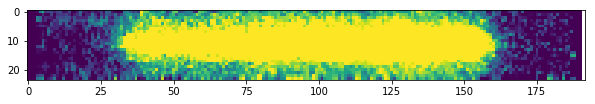

In [48]:
ID = 199
d = fits.open("./DRIZZLE/aXeWFC3_G141_2.STP.fits")["BEAM_%dA" % (ID)].data
im = plt.imshow(d)
im.set_clim(0,0.1)

We plot the extracted 1D spectra of our source and the estimate of the contamination:

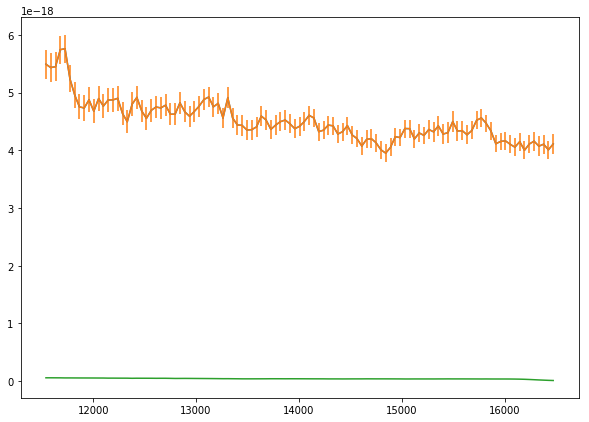

In [49]:
fin = fits.open("./DRIZZLE/aXeWFC3_G141_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>11500) & (x<16500)
plt.plot(x[vg],f[vg])
plt.errorbar(x[vg],f[vg],e[vg])

plt.plot(x[vg],c[vg])

The MEF files in the DRIZZLE directory contain the 2D version of the spectrum of a source as well as estimte of the contamination:

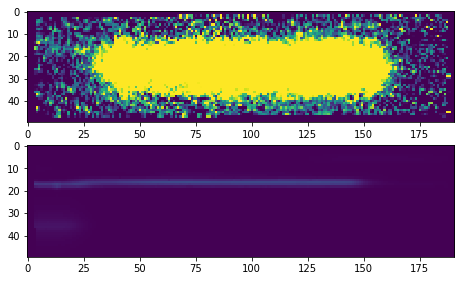

In [50]:
plt.subplot(3,1,1)
d = fits.open("./DRIZZLE/aXeWFC3_G141_mef_ID%d.fits" % (ID))["SCI"].data
im = plt.imshow(d)
im.set_clim(0,0.05)

plt.subplot(3,1,2)
d = fits.open("./DRIZZLE/aXeWFC3_G141_mef_ID%d.fits" % (ID))["CON"].data
im = plt.imshow(d)
im.set_clim(0,0.05)


The individually extracted spectra are in the OUTPUT directory and the combined ones in the DRIZZLE directory. We can plot and compare them:

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


<Container object of 3 artists>

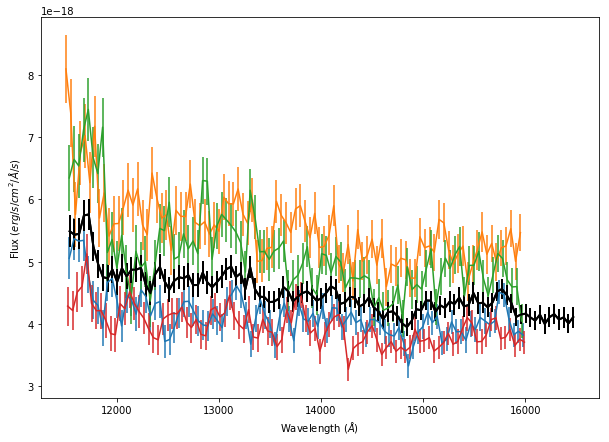

In [51]:
import glob

for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print s
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>11500) & (w<16000)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');


fin = fits.open("./DRIZZLE/aXeWFC3_G141_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>11500) & (x<16500)
#plt.errorbar(x[vg],y[vg],e[vg])
plt.plot(x[vg],f[vg],color='k',lw=2)
plt.errorbar(x[vg],f[vg],e[vg],color='k',lw=2)
